# Goal

- The correlation between users personality and lists evaluation

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
# read csv file
evaluate_data  = pd.read_csv("evaluate_result.csv")
print("Number of records :",len(evaluate_data))

# List1, List2, List3 are represenation of three algo KNNbaseline, Co-clustering, SVD

evaluate_data = evaluate_data.replace(['List 1'],'KNN-B')
evaluate_data = evaluate_data.replace(['List 2'],'Co-clustering')
evaluate_data = evaluate_data.replace(['List 3'],'SVD')

Number of records : 189


In [9]:
evaluate_data = evaluate_data.loc[:,'user_id':'fewer_suggestions']

In [10]:
evaluate_data.head()

,user_id,created,appealed_list,bad_suggestions,similar_result,varied_selection,wider_preference,better_reflection,more_personalized,more_mainstream,better_help,recommended_list,not_expect,familiar_list,surprising_list,fewer_suggestions
0,Eggbjj,2019-09-24 17:27:43.111298+00:00,SVD,Co-clustering,SVD,Co-clustering,SVD,SVD,SVD,SVD,SVD,SVD,SVD,SVD,Co-clustering,SVD
1,rihi,2019-09-24 17:39:07.654961+00:00,KNN-B,Co-clustering,KNN-B,KNN-B,SVD,Co-clustering,KNN-B,Co-clustering,KNN-B,KNN-B,KNN-B,KNN-B,Co-clustering,SVD
2,Test,2019-09-24 17:36:29.198691+00:00,KNN-B,Co-clustering,KNN-B,KNN-B,KNN-B,KNN-B,KNN-B,KNN-B,KNN-B,KNN-B,KNN-B,KNN-B,KNN-B,KNN-B
3,hamza0095,2019-09-24 17:49:06.333710+00:00,SVD,Co-clustering,KNN-B,Co-clustering,KNN-B,KNN-B,SVD,SVD,KNN-B,SVD,Co-clustering,SVD,Co-clustering,SVD
4,abdelbari,2019-09-24 17:52:43.791691+00:00,KNN-B,SVD,KNN-B,Co-clustering,KNN-B,KNN-B,KNN-B,KNN-B,KNN-B,KNN-B,SVD,KNN-B,SVD,SVD


In [15]:
personalty_sur = pd.read_csv('Personality_.csv')
personalty_sur = personalty_sur.loc[:,'user_id':'calm']
len(personalty_sur)

241

In [26]:
personality_alog = pd.merge(personalty_sur, evaluate_data, on = 'user_id',how='inner' )
len(personality_alog)

189

In [27]:
del personality_alog['created_x']
del personality_alog['created_y']
del personality_alog['gender']
del personality_alog['age']

In [28]:
personality_alog.head()

,user_id,country,imaginative,organized,enthusiastic,kind,calm,appealed_list,bad_suggestions,similar_result,...,wider_preference,better_reflection,more_personalized,more_mainstream,better_help,recommended_list,not_expect,familiar_list,surprising_list,fewer_suggestions
0,Eggbjj,IL,Agree,Strongly_Agree,Agree,Agree,Agree,SVD,Co-clustering,SVD,...,SVD,SVD,SVD,SVD,SVD,SVD,SVD,SVD,Co-clustering,SVD
1,rihi,MA,Strongly_Agree,Disagree,Agree,Neutral,Neutral,KNN-B,Co-clustering,KNN-B,...,SVD,Co-clustering,KNN-B,Co-clustering,KNN-B,KNN-B,KNN-B,KNN-B,Co-clustering,SVD
2,Test,MA,Agree,Agree,Agree,Agree,Agree,KNN-B,Co-clustering,KNN-B,...,KNN-B,KNN-B,KNN-B,KNN-B,KNN-B,KNN-B,KNN-B,KNN-B,KNN-B,KNN-B
3,hamza0095,MA,Agree,Agree,Neutral,Neutral,Agree,SVD,Co-clustering,KNN-B,...,KNN-B,KNN-B,SVD,SVD,KNN-B,SVD,Co-clustering,SVD,Co-clustering,SVD
4,abdelbari,MA,Agree,Agree,Neutral,Neutral,Neutral,KNN-B,SVD,KNN-B,...,KNN-B,KNN-B,KNN-B,KNN-B,KNN-B,KNN-B,SVD,KNN-B,SVD,SVD


In [29]:
personality_alog.columns

Index(['user_id', 'country', 'imaginative', 'organized', 'enthusiastic',
       'kind', 'calm', 'appealed_list', 'bad_suggestions', 'similar_result',
       'varied_selection', 'wider_preference', 'better_reflection',
       'more_personalized', 'more_mainstream', 'better_help',
       'recommended_list', 'not_expect', 'familiar_list', 'surprising_list',
       'fewer_suggestions'],
      dtype='object')

In [150]:
def graph(data):
    plt.style.use('ggplot')
    t=plt.figure(figsize=(0.5,1))
    t = data.plot(kind='bar')
    plt.ylabel('Respondent')
    plt.xlabel('Group_A                                                            Group_B')
    for axi in (t.xaxis,):
        for tic in axi.get_major_ticks():
            tic.tick1On = tic.tick2On = False
            tic.label1On = tic.label2On =False

    plt.show()

# Accuracy and personality

#### Imaginative Accuracy

In [166]:
immage_applead_list = personality_alog[["user_id",'imaginative',
                 'appealed_list']].groupby(['imaginative',
                 'appealed_list',]).size()
immage_applead_list

imaginative        appealed_list
Agree              Co-clustering    44
                   KNN-B            17
                   SVD              40
Disagree           Co-clustering     1
                   KNN-B             1
                   SVD               1
Neutral            Co-clustering    11
                   KNN-B             2
                   SVD               3
Strongly_Agree     Co-clustering     6
                   KNN-B            35
                   SVD              27
Strongly_Disagree  SVD               1
dtype: int64

<Figure size 50x100 with 0 Axes>

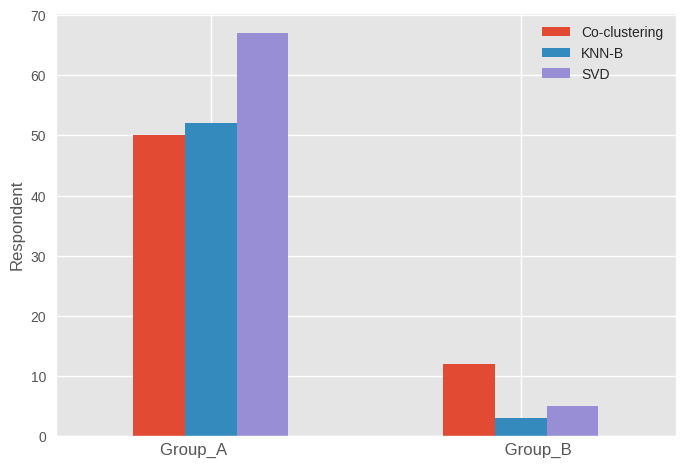

In [167]:
test_data = pd.read_csv('imaginative_accuracy.csv')
graph(test_data)

In [168]:
immage_bad_suggestions = personality_alog[["user_id",'imaginative',
                 'bad_suggestions']].groupby(['imaginative',
                 'bad_suggestions',]).size()
immage_bad_suggestions

imaginative        bad_suggestions
Agree              Co-clustering      59
                   KNN-B              34
                   SVD                 8
Disagree           Co-clustering       2
                   KNN-B               1
Neutral            Co-clustering       3
                   KNN-B              11
                   SVD                 2
Strongly_Agree     Co-clustering      47
                   KNN-B              13
                   SVD                 8
Strongly_Disagree  Co-clustering       1
dtype: int64

<Figure size 50x100 with 0 Axes>

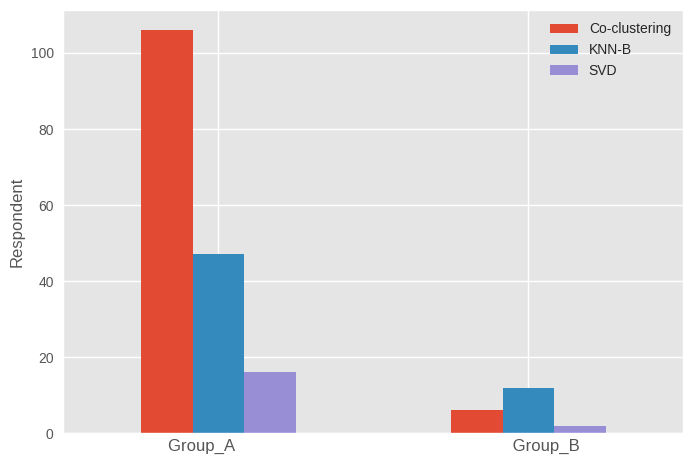

In [169]:
test_data = pd.read_csv('imaginative_bad_suggestions.csv')
graph(test_data)

#### organized Accuracy

In [174]:
personality_alog[["user_id",'organized',
                 'appealed_list']].groupby(['organized',
                 'appealed_list',]).size()

organized          appealed_list
Agree              Co-clustering    43
                   KNN-B            38
                   SVD              29
Disagree           Co-clustering     2
                   KNN-B             3
                   SVD               9
Neutral            Co-clustering    14
                   KNN-B             9
                   SVD              14
Strongly_Agree     Co-clustering     3
                   KNN-B             4
                   SVD              18
Strongly_Disagree  KNN-B             1
                   SVD               2
dtype: int64

<Figure size 50x100 with 0 Axes>

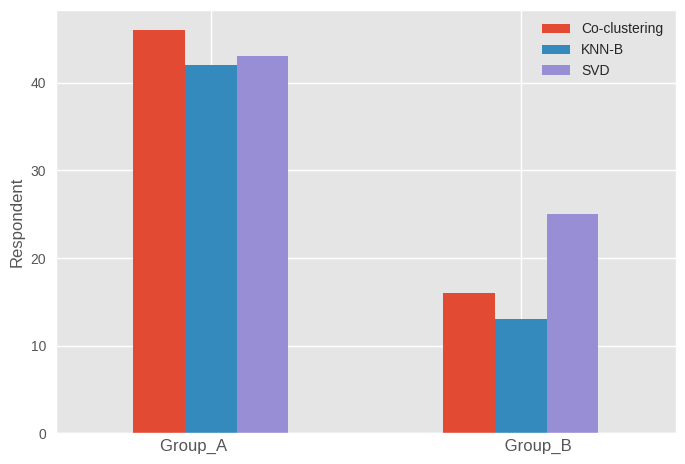

In [175]:
test_data = pd.read_csv('organized_appealed_list.csv')
graph(test_data)

In [172]:
personality_alog[["user_id",'organized',
                 'bad_suggestions']].groupby(['organized',
                 'bad_suggestions',]).size()

organized          bad_suggestions
Agree              Co-clustering      75
                   KNN-B              24
                   SVD                11
Disagree           Co-clustering       5
                   KNN-B               8
                   SVD                 1
Neutral            Co-clustering      17
                   KNN-B              16
                   SVD                 4
Strongly_Agree     Co-clustering      13
                   KNN-B              10
                   SVD                 2
Strongly_Disagree  Co-clustering       2
                   KNN-B               1
dtype: int64

<Figure size 50x100 with 0 Axes>

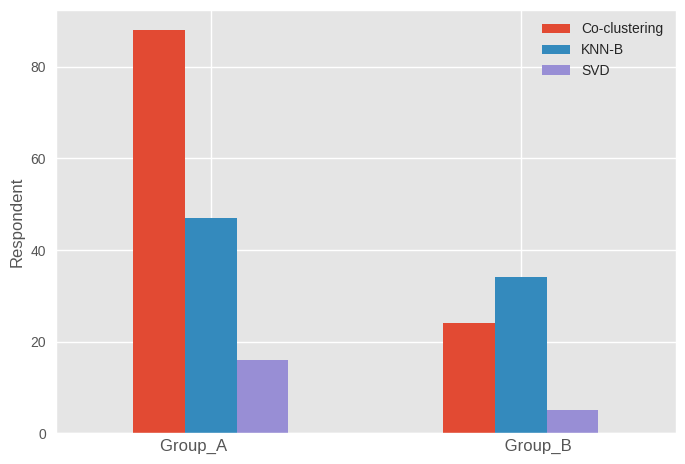

In [173]:
test_data = pd.read_csv('organized_bad_suggestions.csv')
graph(test_data)

#### Enthusiastic Accuracy

In [177]:
personality_alog[["user_id",'enthusiastic',
                 'appealed_list']].groupby(['enthusiastic',
                 'appealed_list',]).size()

enthusiastic       appealed_list
Agree              Co-clustering    10
                   KNN-B            11
                   SVD              18
Disagree           Co-clustering    38
                   KNN-B             2
                   SVD              20
Neutral            Co-clustering     8
                   KNN-B            35
                   SVD              21
Strongly_Agree     Co-clustering     3
                   KNN-B             4
                   SVD               9
Strongly_Disagree  Co-clustering     3
                   KNN-B             3
                   SVD               4
dtype: int64

<Figure size 50x100 with 0 Axes>

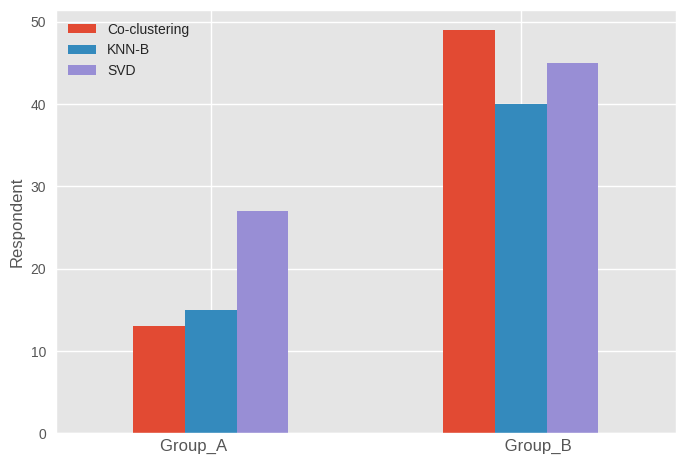

In [178]:
test_data = pd.read_csv('enthusiastic_appealed_list.csv')
graph(test_data)

In [179]:
personality_alog[["user_id",'enthusiastic',
                 'bad_suggestions']].groupby(['enthusiastic',
                 'bad_suggestions',]).size()

enthusiastic       bad_suggestions
Agree              Co-clustering      18
                   KNN-B              16
                   SVD                 5
Disagree           Co-clustering      39
                   KNN-B              17
                   SVD                 4
Neutral            Co-clustering      39
                   KNN-B              19
                   SVD                 6
Strongly_Agree     Co-clustering       9
                   KNN-B               4
                   SVD                 3
Strongly_Disagree  Co-clustering       7
                   KNN-B               3
dtype: int64

<Figure size 50x100 with 0 Axes>

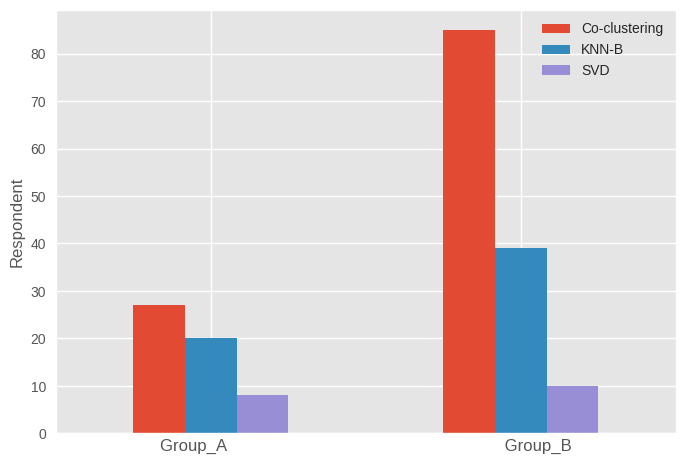

In [182]:
test_data = pd.read_csv('enthusiastic_bad_suggestions.csv')
graph(test_data)

#### kind Accuracy

In [183]:
personality_alog[["user_id",'kind',
                 'appealed_list']].groupby(['kind',
                 'appealed_list',]).size()

kind               appealed_list
Agree              Co-clustering    15
                   KNN-B            38
                   SVD              33
Disagree           Co-clustering    31
                   KNN-B             2
                   SVD               4
Neutral            Co-clustering     8
                   KNN-B             9
                   SVD               9
Strongly_Agree     Co-clustering     8
                   KNN-B             4
                   SVD              24
Strongly_Disagree  KNN-B             2
                   SVD               2
dtype: int64

<Figure size 50x100 with 0 Axes>

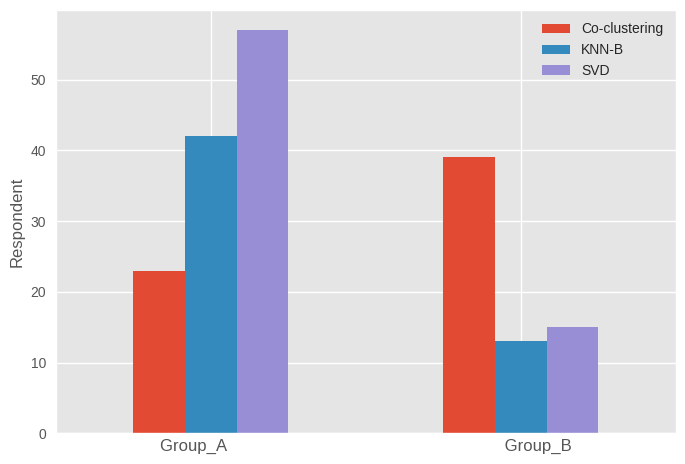

In [184]:
test_data = pd.read_csv('kind_appealed_list.csv')
graph(test_data)

In [185]:
personality_alog[["user_id",'kind',
                 'bad_suggestions']].groupby(['kind',
                 'bad_suggestions',]).size()

kind               bad_suggestions
Agree              Co-clustering      48
                   KNN-B              30
                   SVD                 8
Disagree           Co-clustering      34
                   KNN-B               3
Neutral            Co-clustering       8
                   KNN-B              13
                   SVD                 5
Strongly_Agree     Co-clustering      19
                   KNN-B              13
                   SVD                 4
Strongly_Disagree  Co-clustering       3
                   SVD                 1
dtype: int64

<Figure size 50x100 with 0 Axes>

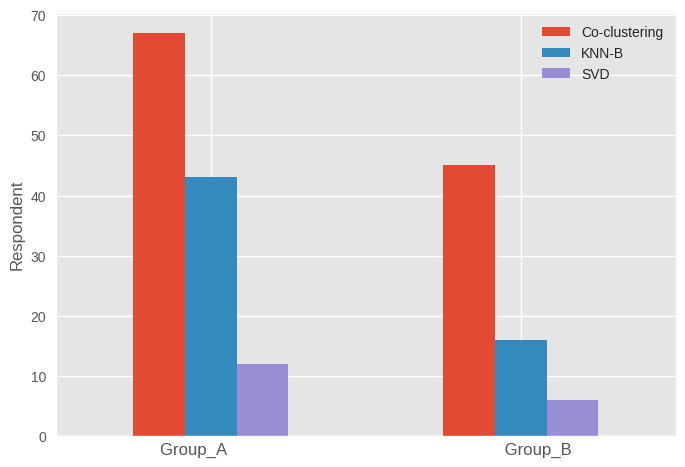

In [191]:
test_data = pd.read_csv('kin_bad_suggestions.csv')
graph(test_data)

#### calm accuracy

In [189]:
personality_alog[["user_id",'calm',
                 'appealed_list']].groupby(['calm',
                 'appealed_list',]).size()

calm               appealed_list
Agree              Co-clustering    35
                   KNN-B            15
                   SVD              33
Disagree           Co-clustering     3
                   KNN-B             5
                   SVD               9
Neutral            Co-clustering    15
                   KNN-B             9
                   SVD              15
Strongly_Agree     Co-clustering     8
                   KNN-B            26
                   SVD              14
Strongly_Disagree  Co-clustering     1
                   SVD               1
dtype: int64

<Figure size 50x100 with 0 Axes>

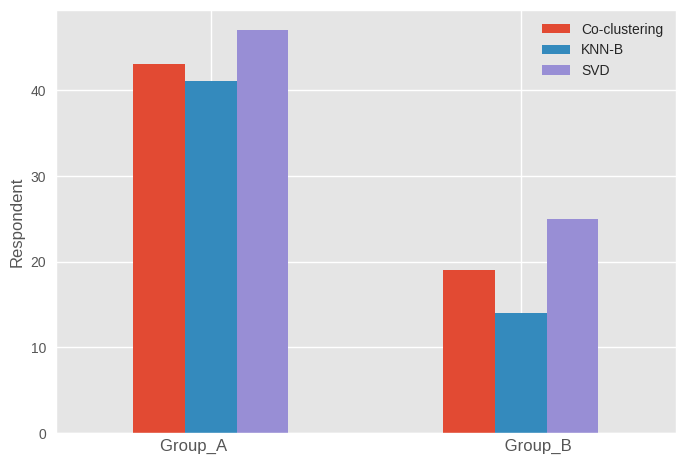

In [192]:
test_data = pd.read_csv('calm_appealed_list.csv')
graph(test_data)

In [193]:
personality_alog[["user_id",'calm',
                 'bad_suggestions']].groupby(['calm',
                 'bad_suggestions',]).size()

calm               bad_suggestions
Agree              Co-clustering      60
                   KNN-B              20
                   SVD                 3
Disagree           Co-clustering       9
                   KNN-B               6
                   SVD                 2
Neutral            Co-clustering      12
                   KNN-B              20
                   SVD                 7
Strongly_Agree     Co-clustering      30
                   KNN-B              12
                   SVD                 6
Strongly_Disagree  Co-clustering       1
                   KNN-B               1
dtype: int64

<Figure size 50x100 with 0 Axes>

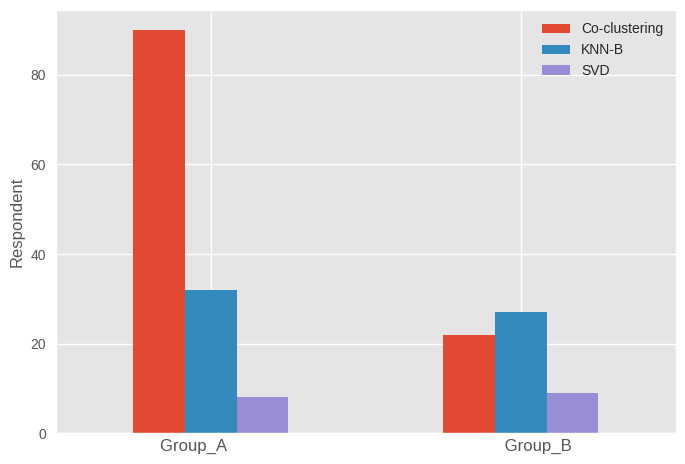

In [194]:
test_data = pd.read_csv('calm_bad_suggestions.csv')
graph(test_data)

## Diversity and Personality

### Imaginative diversity

In [195]:
personality_alog[["user_id",'imaginative',
                 'similar_result']].groupby(['imaginative',
                 'similar_result',]).size()

imaginative        similar_result
Agree              Co-clustering     23
                   KNN-B             15
                   SVD               63
Disagree           Co-clustering      1
                   SVD                2
Neutral            Co-clustering      6
                   KNN-B              2
                   SVD                8
Strongly_Agree     Co-clustering     19
                   KNN-B             32
                   SVD               17
Strongly_Disagree  SVD                1
dtype: int64

<Figure size 50x100 with 0 Axes>

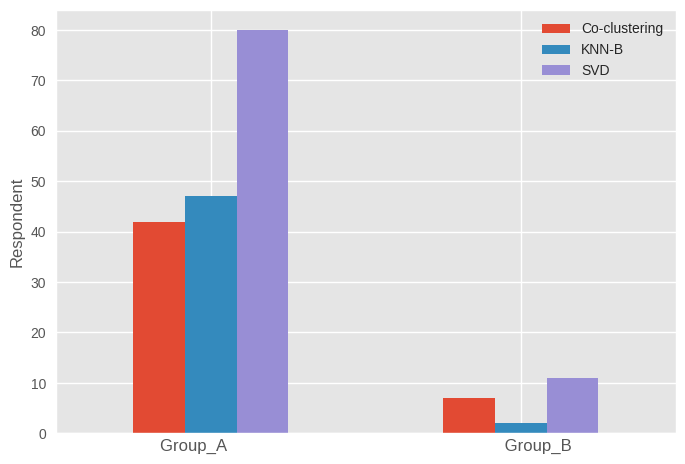

In [196]:
test_data = pd.read_csv('immaginative_similar_result.csv')
graph(test_data)

In [197]:
personality_alog[["user_id",'imaginative',
                 'varied_selection']].groupby(['imaginative',
                 'varied_selection',]).size()

imaginative        varied_selection
Agree              Co-clustering       57
                   KNN-B               29
                   SVD                 15
Disagree           Co-clustering        1
                   KNN-B                2
Neutral            Co-clustering        7
                   KNN-B                4
                   SVD                  5
Strongly_Agree     Co-clustering       13
                   KNN-B               40
                   SVD                 15
Strongly_Disagree  Co-clustering        1
dtype: int64

<Figure size 50x100 with 0 Axes>

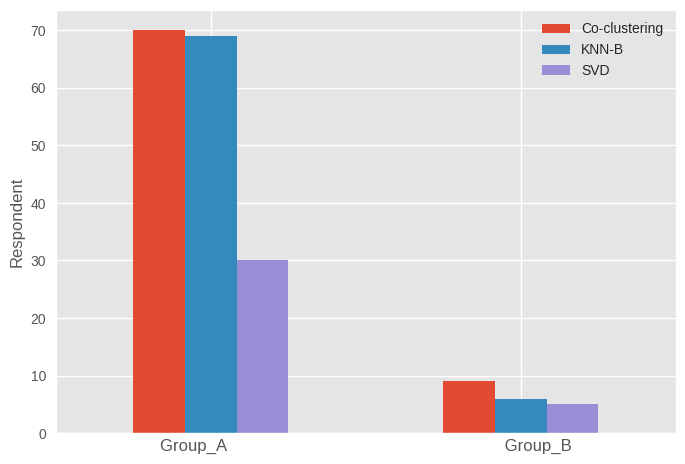

In [198]:
test_data = pd.read_csv('immaginative_varied_selection.csv')
graph(test_data)

In [199]:
personality_alog[["user_id",'imaginative',
                 'wider_preference']].groupby(['imaginative',
                 'wider_preference',]).size()

imaginative        wider_preference
Agree              Co-clustering       24
                   KNN-B               51
                   SVD                 26
Disagree           Co-clustering        1
                   KNN-B                2
Neutral            Co-clustering        8
                   KNN-B                1
                   SVD                  7
Strongly_Agree     Co-clustering       13
                   KNN-B               35
                   SVD                 20
Strongly_Disagree  SVD                  1
dtype: int64

<Figure size 50x100 with 0 Axes>

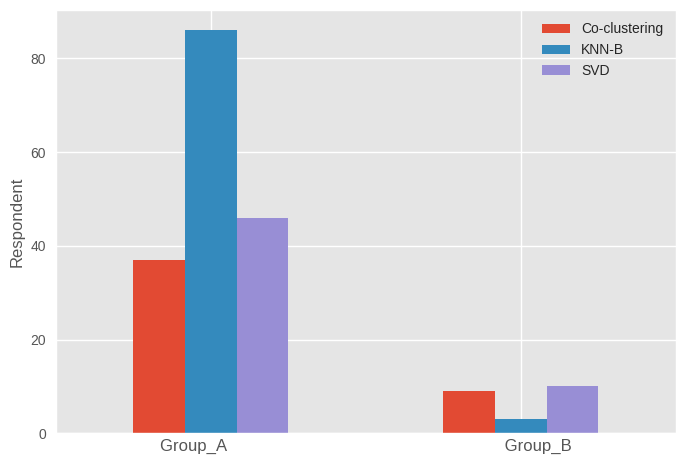

In [200]:
test_data = pd.read_csv('immaginative_wider_preference.csv')
graph(test_data)

### organized Diversity

In [201]:
personality_alog[["user_id",'organized',
                 'similar_result']].groupby(['organized',
                 'similar_result',]).size()

organized          similar_result
Agree              Co-clustering     19
                   KNN-B             29
                   SVD               62
Disagree           Co-clustering      6
                   KNN-B              6
                   SVD                2
Neutral            Co-clustering     13
                   KNN-B              9
                   SVD               15
Strongly_Agree     Co-clustering     11
                   KNN-B              4
                   SVD               10
Strongly_Disagree  KNN-B              1
                   SVD                2
dtype: int64

<Figure size 50x100 with 0 Axes>

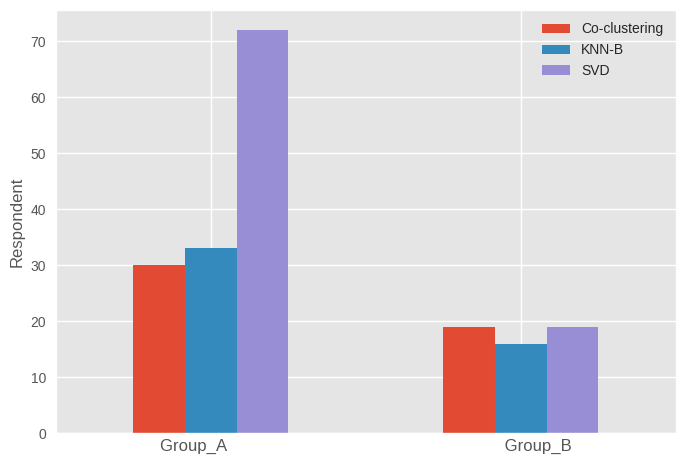

In [209]:
test_data = pd.read_csv('organized_similar_resuls.csv')
graph(test_data)

In [203]:
personality_alog[["user_id",'organized',
                 'varied_selection']].groupby(['organized',
                 'varied_selection',]).size()

organized          varied_selection
Agree              Co-clustering       54
                   KNN-B               44
                   SVD                 12
Disagree           Co-clustering        5
                   KNN-B                4
                   SVD                  5
Neutral            Co-clustering       14
                   KNN-B               11
                   SVD                 12
Strongly_Agree     Co-clustering        5
                   KNN-B               15
                   SVD                  5
Strongly_Disagree  Co-clustering        1
                   KNN-B                1
                   SVD                  1
dtype: int64

<Figure size 50x100 with 0 Axes>

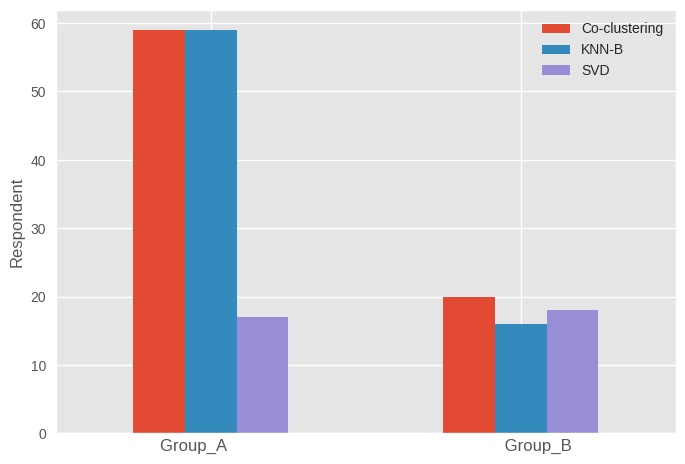

In [210]:
test_data = pd.read_csv('organized_varied_selection.csv')
graph(test_data)

In [212]:
personality_alog[["user_id",'organized',
                 'wider_preference']].groupby(['organized',
                 'wider_preference',]).size()

organized          wider_preference
Agree              Co-clustering       19
                   KNN-B               67
                   SVD                 24
Disagree           Co-clustering        4
                   KNN-B                3
                   SVD                  7
Neutral            Co-clustering       16
                   KNN-B                9
                   SVD                 12
Strongly_Agree     Co-clustering        6
                   KNN-B               10
                   SVD                  9
Strongly_Disagree  Co-clustering        1
                   SVD                  2
dtype: int64

<Figure size 50x100 with 0 Axes>

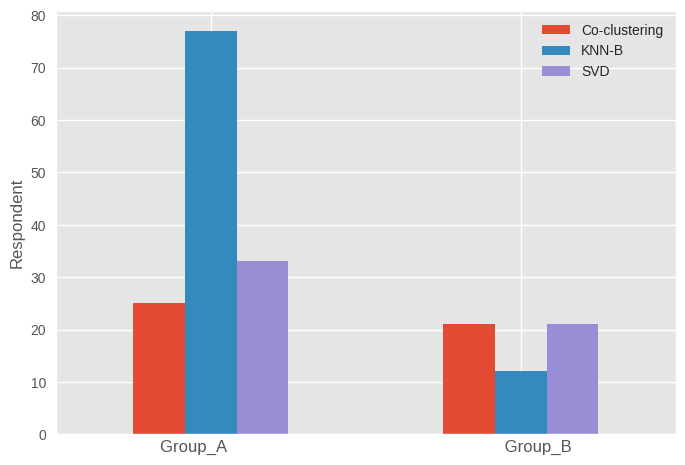

In [214]:
test_data = pd.read_csv('organized_wider_preference.csv')
graph(test_data)

### enthusiastic diversity

In [215]:
personality_alog[["user_id",'enthusiastic',
                 'similar_result']].groupby(['enthusiastic',
                 'similar_result',]).size()

enthusiastic       similar_result
Agree              Co-clustering     18
                   KNN-B              6
                   SVD               15
Disagree           Co-clustering      6
                   KNN-B              5
                   SVD               49
Neutral            Co-clustering     14
                   KNN-B             30
                   SVD               20
Strongly_Agree     Co-clustering      8
                   KNN-B              5
                   SVD                3
Strongly_Disagree  Co-clustering      3
                   KNN-B              3
                   SVD                4
dtype: int64

<Figure size 50x100 with 0 Axes>

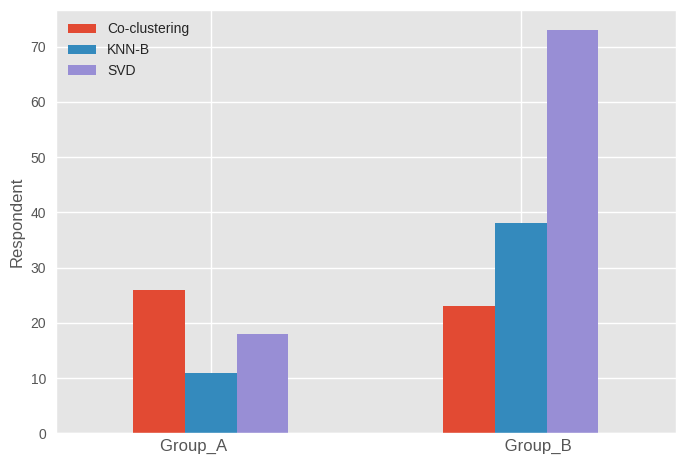

In [219]:
test_data = pd.read_csv('enthusiastic_similar_result.csv')
graph(test_data)

In [216]:
personality_alog[["user_id",'enthusiastic',
                 'varied_selection']].groupby(['enthusiastic',
                 'varied_selection',]).size()

enthusiastic       varied_selection
Agree              Co-clustering       12
                   KNN-B               22
                   SVD                  5
Disagree           Co-clustering       43
                   KNN-B               11
                   SVD                  6
Neutral            Co-clustering       19
                   KNN-B               29
                   SVD                 16
Strongly_Agree     Co-clustering        2
                   KNN-B                8
                   SVD                  6
Strongly_Disagree  Co-clustering        3
                   KNN-B                5
                   SVD                  2
dtype: int64

<Figure size 50x100 with 0 Axes>

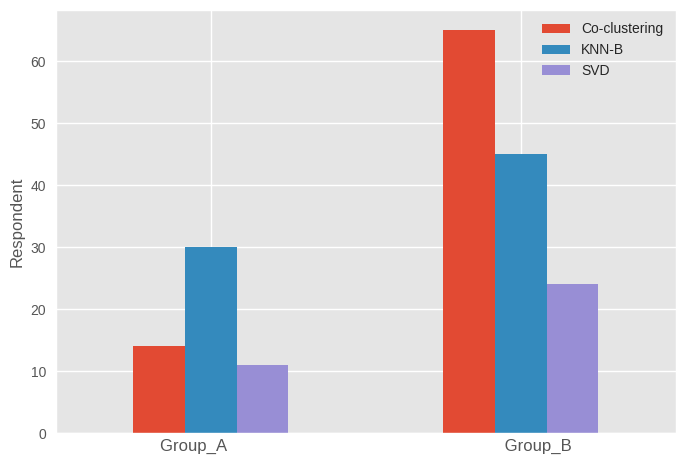

In [220]:
test_data = pd.read_csv('enthusiastic_varied_selection.csv')
graph(test_data)

In [218]:
personality_alog[["user_id",'enthusiastic',
                 'wider_preference']].groupby(['enthusiastic',
                 'wider_preference',]).size()

enthusiastic       wider_preference
Agree              Co-clustering       13
                   KNN-B               13
                   SVD                 13
Disagree           Co-clustering       17
                   KNN-B               33
                   SVD                 10
Neutral            Co-clustering       11
                   KNN-B               33
                   SVD                 20
Strongly_Agree     Co-clustering        5
                   KNN-B                5
                   SVD                  6
Strongly_Disagree  KNN-B                5
                   SVD                  5
dtype: int64

<Figure size 50x100 with 0 Axes>

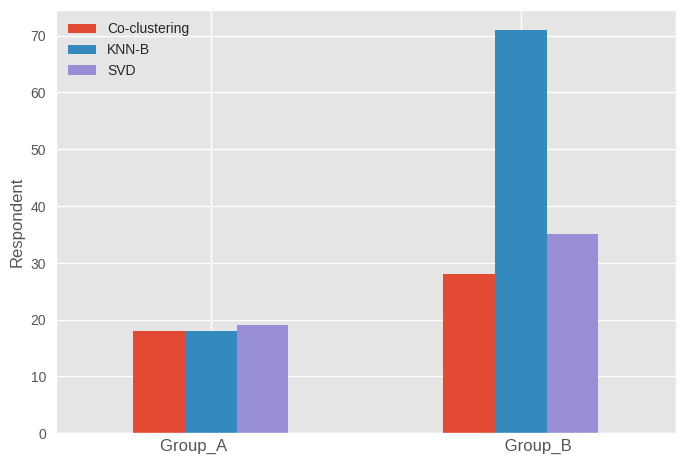

In [221]:
test_data = pd.read_csv('enthusiastic_wider_preference.csv')
graph(test_data)

### kind Diversity

In [231]:
personality_alog[["user_id",'kind',
                 'similar_result']].groupby(['kind',
                 'similar_result',]).size()

kind               similar_result
Agree              Co-clustering     26
                   KNN-B             32
                   SVD               28
Disagree           Co-clustering      1
                   KNN-B              2
                   SVD               34
Neutral            Co-clustering      3
                   KNN-B             11
                   SVD               12
Strongly_Agree     Co-clustering     17
                   KNN-B              4
                   SVD               15
Strongly_Disagree  Co-clustering      2
                   SVD                2
dtype: int64

<Figure size 50x100 with 0 Axes>

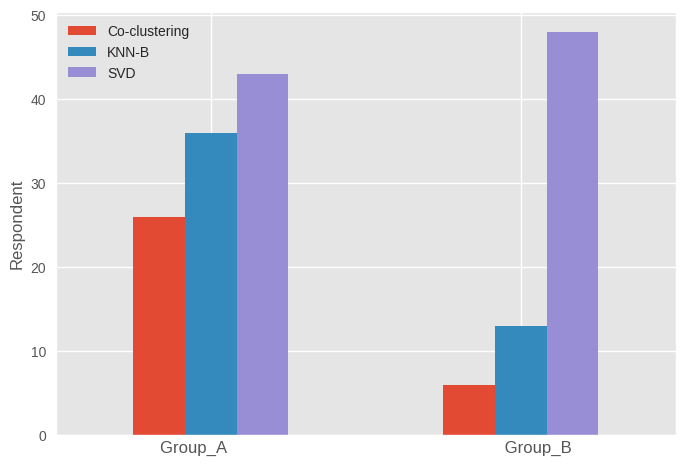

In [232]:
test_data = pd.read_csv('kind_similar_result.csv')
graph(test_data)

In [222]:
personality_alog[["user_id",'kind',
                 'varied_selection']].groupby(['kind',
                 'varied_selection',]).size()

kind               varied_selection
Agree              Co-clustering       29
                   KNN-B               41
                   SVD                 16
Disagree           Co-clustering       32
                   KNN-B                3
                   SVD                  2
Neutral            Co-clustering       11
                   KNN-B                8
                   SVD                  7
Strongly_Agree     Co-clustering        5
                   KNN-B               22
                   SVD                  9
Strongly_Disagree  Co-clustering        2
                   KNN-B                1
                   SVD                  1
dtype: int64

<Figure size 50x100 with 0 Axes>

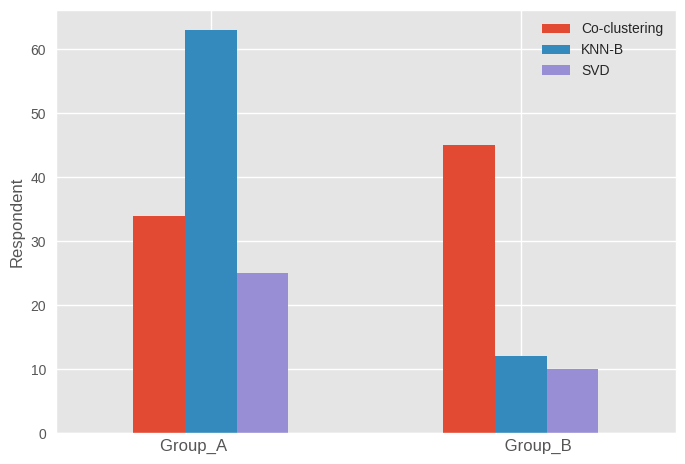

In [227]:
test_data = pd.read_csv('kind_varied_selection.csv')
graph(test_data)

In [224]:
personality_alog[["user_id",'kind',
                 'wider_preference']].groupby(['kind',
                 'wider_preference',]).size()

kind               wider_preference
Agree              Co-clustering       21
                   KNN-B               39
                   SVD                 26
Disagree           Co-clustering        3
                   KNN-B               30
                   SVD                  4
Neutral            Co-clustering       12
                   KNN-B                6
                   SVD                  8
Strongly_Agree     Co-clustering        9
                   KNN-B               12
                   SVD                 15
Strongly_Disagree  Co-clustering        1
                   KNN-B                2
                   SVD                  1
dtype: int64

<Figure size 50x100 with 0 Axes>

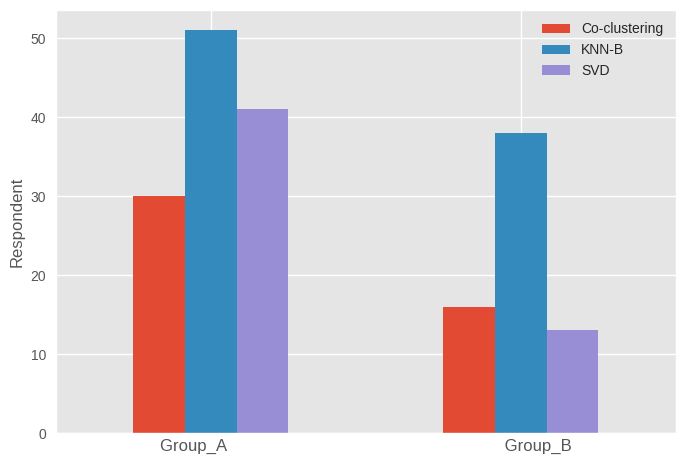

In [229]:
test_data = pd.read_csv('kind_wider_preference.csv')
graph(test_data)

### calm Diversity

In [234]:
personality_alog[["user_id",'calm',
                 'similar_result']].groupby(['calm',
                 'similar_result',]).size()

calm               similar_result
Agree              Co-clustering     20
                   KNN-B              8
                   SVD               55
Disagree           Co-clustering      6
                   KNN-B              3
                   SVD                8
Neutral            Co-clustering     11
                   KNN-B             12
                   SVD               16
Strongly_Agree     Co-clustering     11
                   KNN-B             26
                   SVD               11
Strongly_Disagree  Co-clustering      1
                   SVD                1
dtype: int64

<Figure size 50x100 with 0 Axes>

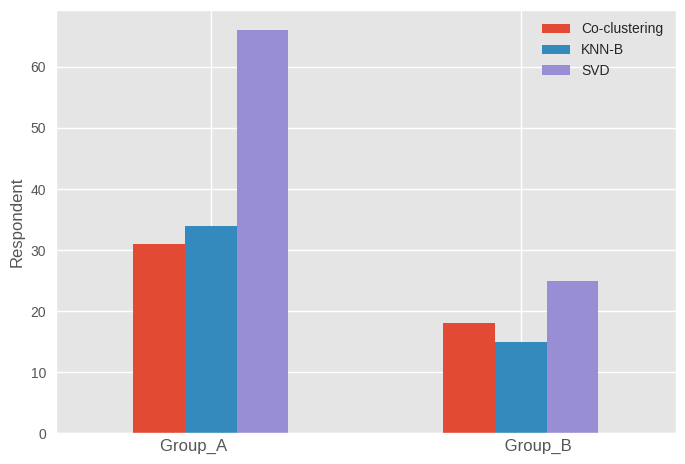

In [235]:
test_data = pd.read_csv('calm_similar_result.csv')
graph(test_data)

In [236]:
personality_alog[["user_id",'calm',
                 'varied_selection']].groupby(['calm',
                 'varied_selection',]).size()

calm               varied_selection
Agree              Co-clustering       45
                   KNN-B               31
                   SVD                  7
Disagree           Co-clustering        7
                   KNN-B                7
                   SVD                  3
Neutral            Co-clustering       17
                   KNN-B                7
                   SVD                 15
Strongly_Agree     Co-clustering        8
                   KNN-B               30
                   SVD                 10
Strongly_Disagree  Co-clustering        2
dtype: int64

<Figure size 50x100 with 0 Axes>

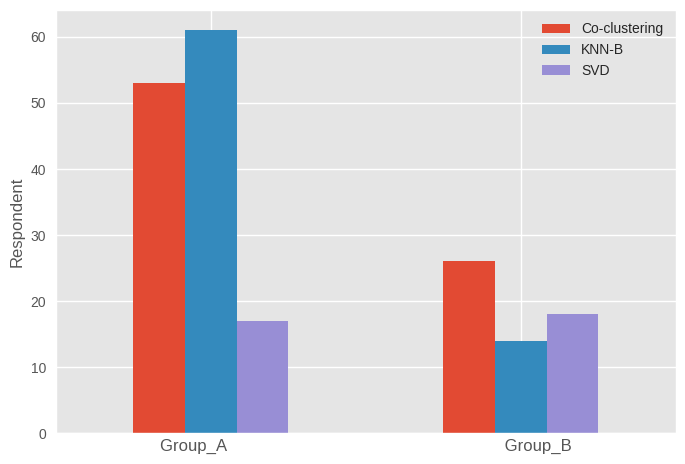

In [237]:
test_data = pd.read_csv('calm_varied_selection.csv')
graph(test_data)

In [238]:
personality_alog[["user_id",'calm',
                 'wider_preference']].groupby(['calm',
                 'wider_preference',]).size()

calm               wider_preference
Agree              Co-clustering       18
                   KNN-B               44
                   SVD                 21
Disagree           Co-clustering        7
                   KNN-B                7
                   SVD                  3
Neutral            Co-clustering       16
                   KNN-B               11
                   SVD                 12
Strongly_Agree     Co-clustering        5
                   KNN-B               27
                   SVD                 16
Strongly_Disagree  SVD                  2
dtype: int64

<Figure size 50x100 with 0 Axes>

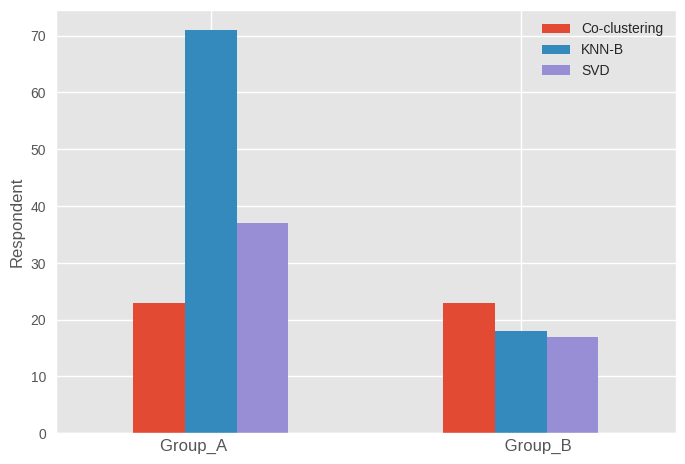

In [239]:
test_data = pd.read_csv('calm_wider_preference.csv')
graph(test_data)

## Understand Me Pesonality

### Imaginative Understand Me

In [240]:
personality_alog[["user_id",'imaginative',
                 'better_reflection']].groupby(['imaginative',
                 'better_reflection',]).size()

imaginative        better_reflection
Agree              Co-clustering        15
                   KNN-B                15
                   SVD                  71
Disagree           Co-clustering         1
                   KNN-B                 1
                   SVD                   1
Neutral            Co-clustering        12
                   KNN-B                 1
                   SVD                   3
Strongly_Agree     Co-clustering         7
                   KNN-B                33
                   SVD                  28
Strongly_Disagree  SVD                   1
dtype: int64

<Figure size 50x100 with 0 Axes>

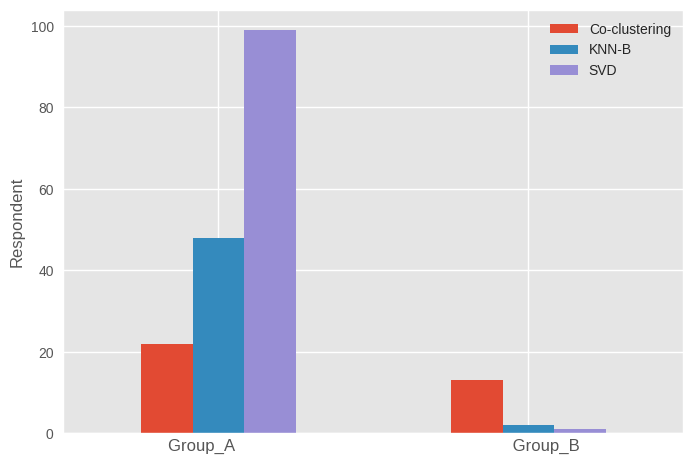

In [241]:
test_data = pd.read_csv('imaginative_better_reflection.csv')
graph(test_data)

In [242]:
personality_alog[["user_id",'imaginative',
                 'more_personalized']].groupby(['imaginative',
                 'more_personalized',]).size()

imaginative        more_personalized
Agree              Co-clustering        19
                   KNN-B                13
                   SVD                  69
Disagree           Co-clustering         1
                   KNN-B                 1
                   SVD                   1
Neutral            Co-clustering        10
                   KNN-B                 2
                   SVD                   4
Strongly_Agree     Co-clustering        10
                   KNN-B                30
                   SVD                  28
Strongly_Disagree  SVD                   1
dtype: int64

<Figure size 50x100 with 0 Axes>

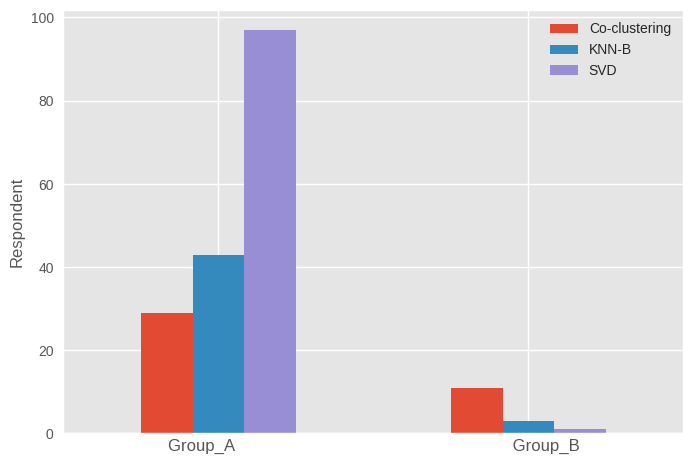

In [243]:
test_data = pd.read_csv('imaginative_more_personalized.csv')
graph(test_data)

In [245]:
personality_alog[["user_id",'imaginative',
                 'more_mainstream']].groupby(['imaginative',
                 'more_mainstream',]).size()

imaginative        more_mainstream
Agree              Co-clustering      12
                   KNN-B              23
                   SVD                66
Disagree           KNN-B               2
                   SVD                 1
Neutral            Co-clustering       4
                   KNN-B               1
                   SVD                11
Strongly_Agree     Co-clustering      13
                   KNN-B              19
                   SVD                36
Strongly_Disagree  SVD                 1
dtype: int64

<Figure size 50x100 with 0 Axes>

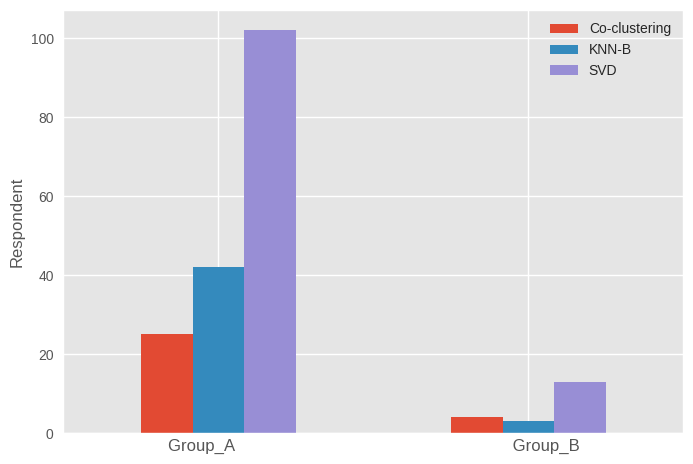

In [246]:
test_data = pd.read_csv('imaginative_more_mainstream.csv')
graph(test_data)

### organized Understand Me

In [247]:
personality_alog[["user_id",'organized',
                 'better_reflection']].groupby(['organized',
                 'better_reflection',]).size()

organized          better_reflection
Agree              Co-clustering        14
                   KNN-B                38
                   SVD                  58
Disagree           Co-clustering         3
                   KNN-B                 2
                   SVD                   9
Neutral            Co-clustering        14
                   KNN-B                 7
                   SVD                  16
Strongly_Agree     Co-clustering         4
                   KNN-B                 2
                   SVD                  19
Strongly_Disagree  KNN-B                 1
                   SVD                   2
dtype: int64

<Figure size 50x100 with 0 Axes>

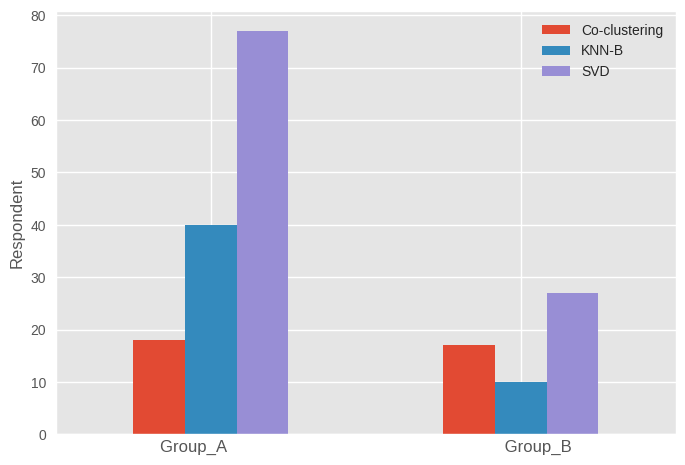

In [258]:
 test_data = pd.read_csv('organized_better_reflection.csv')
graph(test_data)


In [248]:
personality_alog[["user_id",'organized',
                 'more_personalized']].groupby(['organized',
                 'more_personalized',]).size()

organized          more_personalized
Agree              Co-clustering        15
                   KNN-B                32
                   SVD                  63
Disagree           Co-clustering         2
                   KNN-B                 3
                   SVD                   9
Neutral            Co-clustering        17
                   KNN-B                 7
                   SVD                  13
Strongly_Agree     Co-clustering         6
                   KNN-B                 3
                   SVD                  16
Strongly_Disagree  KNN-B                 1
                   SVD                   2
dtype: int64

<Figure size 50x100 with 0 Axes>

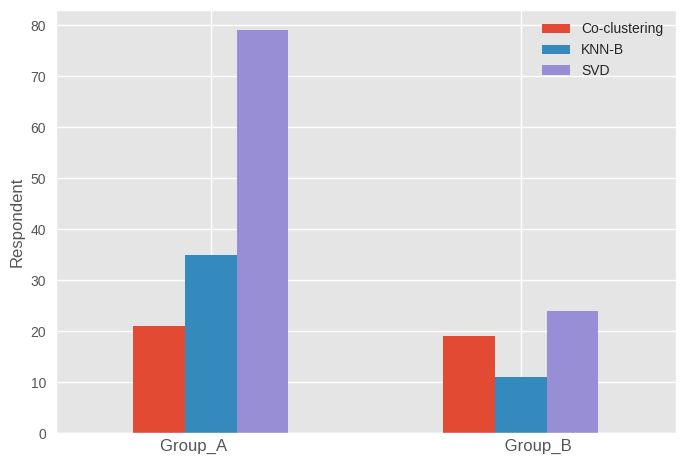

In [259]:
test_data = pd.read_csv('organized_more_personalized.csv')
graph(test_data)

In [249]:
personality_alog[["user_id",'organized',
                 'more_mainstream']].groupby(['organized',
                 'more_mainstream',]).size()

organized          more_mainstream
Agree              Co-clustering      15
                   KNN-B              23
                   SVD                72
Disagree           Co-clustering       2
                   KNN-B               3
                   SVD                 9
Neutral            Co-clustering       7
                   KNN-B              11
                   SVD                19
Strongly_Agree     Co-clustering       5
                   KNN-B               8
                   SVD                12
Strongly_Disagree  SVD                 3
dtype: int64

<Figure size 50x100 with 0 Axes>

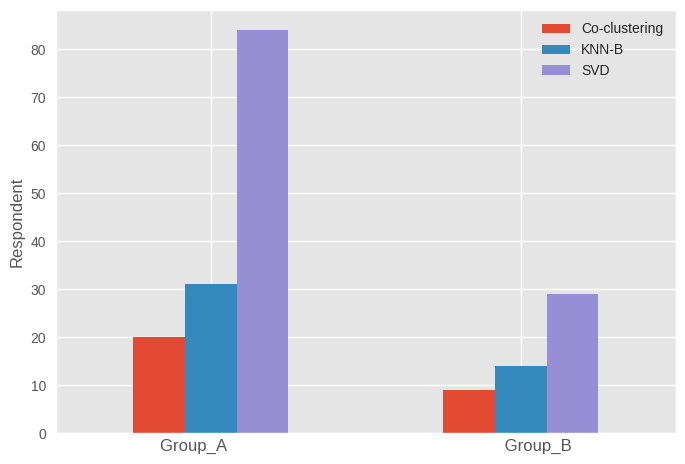

In [260]:
test_data = pd.read_csv('organized_more_mainstream.csv')
graph(test_data)

### enthusiastic Understand Me

In [250]:
personality_alog[["user_id",'enthusiastic',
                 'better_reflection']].groupby(['enthusiastic',
                 'better_reflection',]).size()

enthusiastic       better_reflection
Agree              Co-clustering        12
                   KNN-B                 9
                   SVD                  18
Disagree           Co-clustering        10
                   SVD                  50
Neutral            Co-clustering         7
                   KNN-B                34
                   SVD                  23
Strongly_Agree     Co-clustering         3
                   KNN-B                 4
                   SVD                   9
Strongly_Disagree  Co-clustering         3
                   KNN-B                 3
                   SVD                   4
dtype: int64

<Figure size 50x100 with 0 Axes>

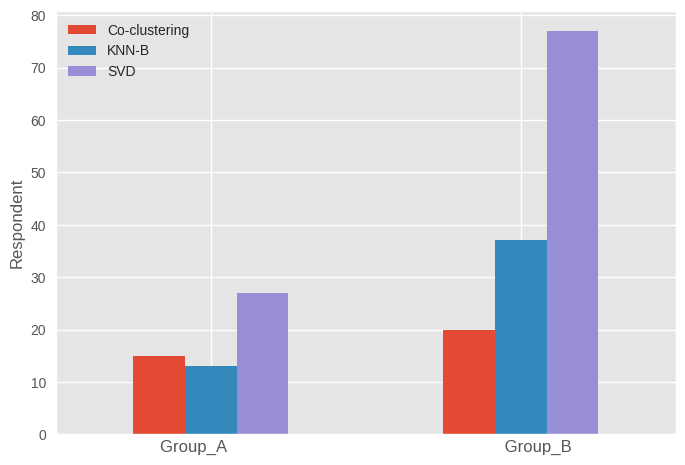

In [261]:
 test_data = pd.read_csv('enthusiastic_better_reflection.csv')
graph(test_data)

In [251]:

personality_alog[["user_id",'enthusiastic',
                 'more_personalized']].groupby(['enthusiastic',
                 'more_personalized',]).size()

enthusiastic       more_personalized
Agree              Co-clustering        11
                   KNN-B                 6
                   SVD                  22
Disagree           Co-clustering         9
                   KNN-B                 3
                   SVD                  48
Neutral            Co-clustering        13
                   KNN-B                30
                   SVD                  21
Strongly_Agree     Co-clustering         4
                   KNN-B                 4
                   SVD                   8
Strongly_Disagree  Co-clustering         3
                   KNN-B                 3
                   SVD                   4
dtype: int64

<Figure size 50x100 with 0 Axes>

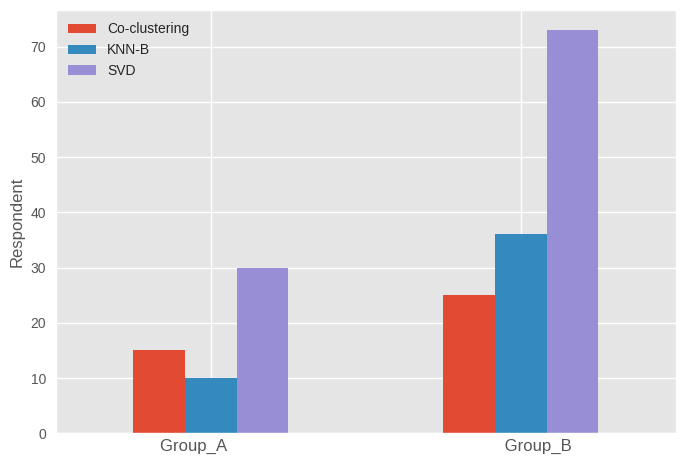

In [262]:
test_data = pd.read_csv('enthusiastic_more_personalized.csv')
graph(test_data)


In [252]:
personality_alog[["user_id",'enthusiastic',
                 'more_mainstream']].groupby(['enthusiastic',
                 'more_mainstream',]).size()

enthusiastic       more_mainstream
Agree              Co-clustering      11
                   KNN-B              12
                   SVD                16
Disagree           Co-clustering       5
                   KNN-B               6
                   SVD                49
Neutral            Co-clustering      10
                   KNN-B              19
                   SVD                35
Strongly_Agree     Co-clustering       3
                   KNN-B               6
                   SVD                 7
Strongly_Disagree  KNN-B               2
                   SVD                 8
dtype: int64

<Figure size 50x100 with 0 Axes>

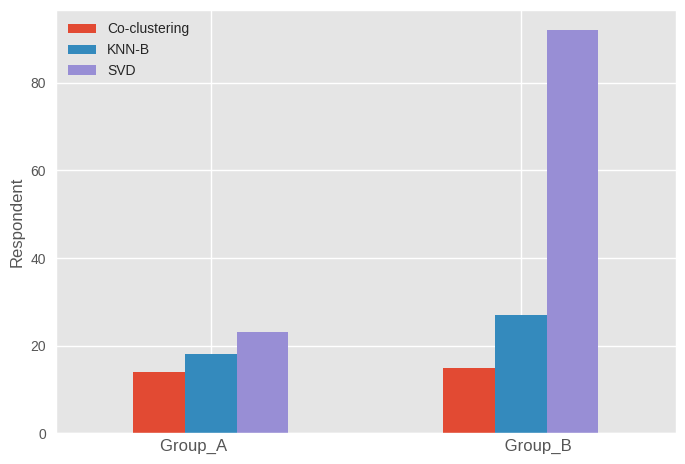

In [263]:
test_data = pd.read_csv('enthusiastic_more_mainstream.csv')
graph(test_data)

### kind Understand Me

In [266]:
personality_alog[["user_id",'kind',
                 'better_reflection']].groupby(['kind',
                 'better_reflection',]).size()


kind               better_reflection
Agree              Co-clustering        16
                   KNN-B                36
                   SVD                  34
Disagree           Co-clustering         3
                   KNN-B                 2
                   SVD                  32
Neutral            Co-clustering         9
                   KNN-B                 7
                   SVD                  10
Strongly_Agree     Co-clustering         7
                   KNN-B                 3
                   SVD                  26
Strongly_Disagree  KNN-B                 2
                   SVD                   2
dtype: int64

<Figure size 50x100 with 0 Axes>

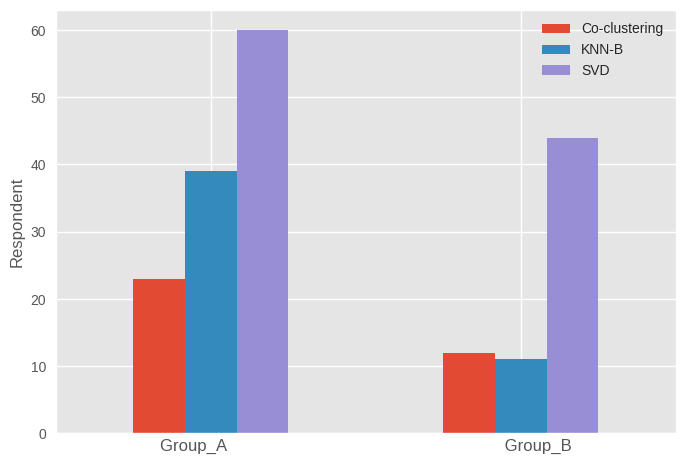

In [267]:
 test_data = pd.read_csv('kind_better_reflection.csv')
graph(test_data)

In [268]:
personality_alog[["user_id",'kind',
                 'more_personalized']].groupby(['kind',
                 'more_personalized',]).size()

kind               more_personalized
Agree              Co-clustering        18
                   KNN-B                32
                   SVD                  36
Disagree           Co-clustering         2
                   KNN-B                 3
                   SVD                  32
Neutral            Co-clustering        11
                   KNN-B                 7
                   SVD                   8
Strongly_Agree     Co-clustering         8
                   KNN-B                 3
                   SVD                  25
Strongly_Disagree  Co-clustering         1
                   KNN-B                 1
                   SVD                   2
dtype: int64

<Figure size 50x100 with 0 Axes>

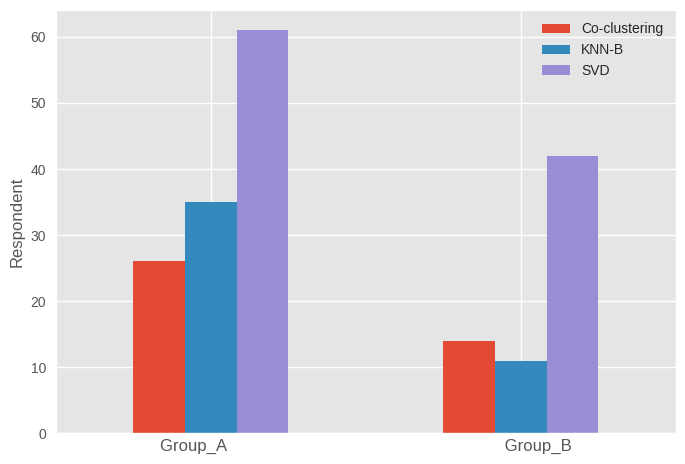

In [270]:
test_data = pd.read_csv('kind_more_personalized.csv')
graph(test_data)

In [269]:
personality_alog[["user_id",'kind',
                 'more_mainstream']].groupby(['kind',
                 'more_mainstream',]).size()

kind               more_mainstream
Agree              Co-clustering      16
                   KNN-B              26
                   SVD                44
Disagree           Co-clustering       1
                   KNN-B               1
                   SVD                35
Neutral            Co-clustering       5
                   KNN-B               5
                   SVD                16
Strongly_Agree     Co-clustering       6
                   KNN-B              12
                   SVD                18
Strongly_Disagree  Co-clustering       1
                   KNN-B               1
                   SVD                 2
dtype: int64

<Figure size 50x100 with 0 Axes>

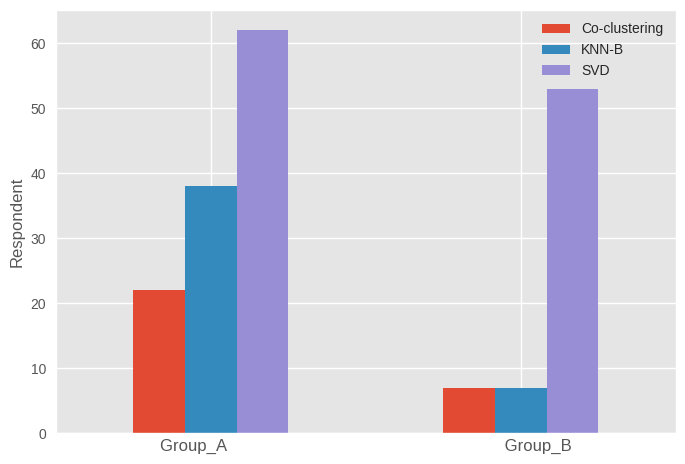

In [271]:
test_data = pd.read_csv('kind_more_mainstream.csv')
graph(test_data)

### calm Understand Me

In [255]:
personality_alog[["user_id",'calm',
                 'better_reflection']].groupby(['calm',
                 'better_reflection',]).size()

calm               better_reflection
Agree              Co-clustering         8
                   KNN-B                15
                   SVD                  60
Disagree           Co-clustering         3
                   KNN-B                 5
                   SVD                   9
Neutral            Co-clustering        15
                   KNN-B                 7
                   SVD                  17
Strongly_Agree     Co-clustering         8
                   KNN-B                23
                   SVD                  17
Strongly_Disagree  Co-clustering         1
                   SVD                   1
dtype: int64

<Figure size 50x100 with 0 Axes>

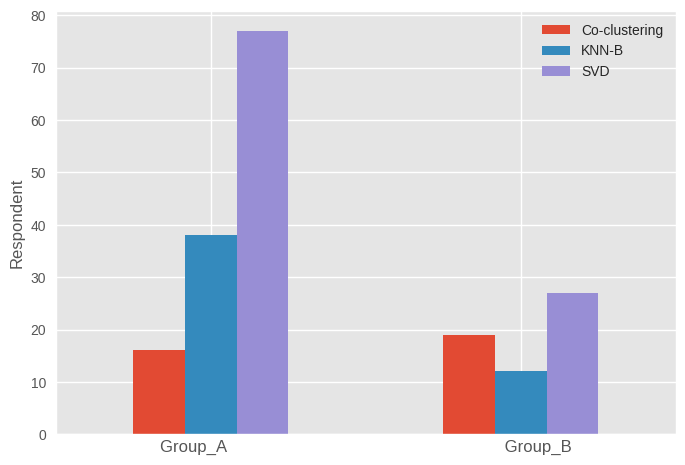

In [272]:
 test_data = pd.read_csv('calm_better_reflection.csv')
graph(test_data)

In [256]:
personality_alog[["user_id",'calm',
                 'more_personalized']].groupby(['calm',
                 'more_personalized',]).size()

calm               more_personalized
Agree              Co-clustering        10
                   KNN-B                11
                   SVD                  62
Disagree           Co-clustering         3
                   KNN-B                 5
                   SVD                   9
Neutral            Co-clustering        19
                   KNN-B                 7
                   SVD                  13
Strongly_Agree     Co-clustering         7
                   KNN-B                23
                   SVD                  18
Strongly_Disagree  Co-clustering         1
                   SVD                   1
dtype: int64

<Figure size 50x100 with 0 Axes>

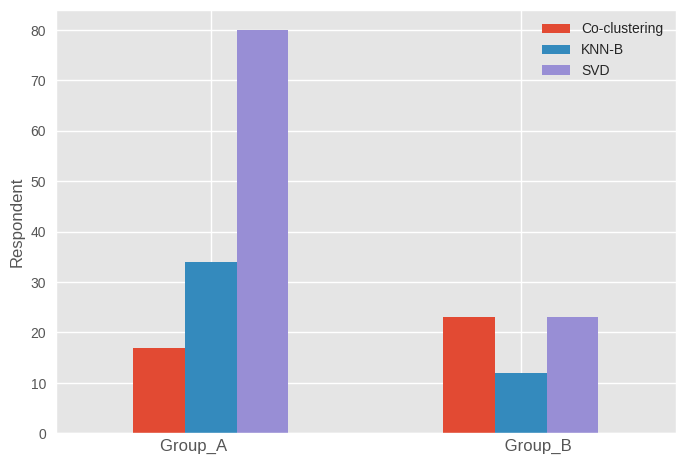

In [273]:
test_data = pd.read_csv('calm_more_personalized.csv')
graph(test_data)

In [257]:
personality_alog[["user_id",'calm',
                 'more_mainstream']].groupby(['calm',
                 'more_mainstream',]).size()

calm               more_mainstream
Agree              Co-clustering      10
                   KNN-B              21
                   SVD                52
Disagree           Co-clustering       2
                   KNN-B               4
                   SVD                11
Neutral            Co-clustering       9
                   KNN-B              13
                   SVD                17
Strongly_Agree     Co-clustering       8
                   KNN-B               7
                   SVD                33
Strongly_Disagree  SVD                 2
dtype: int64

<Figure size 50x100 with 0 Axes>

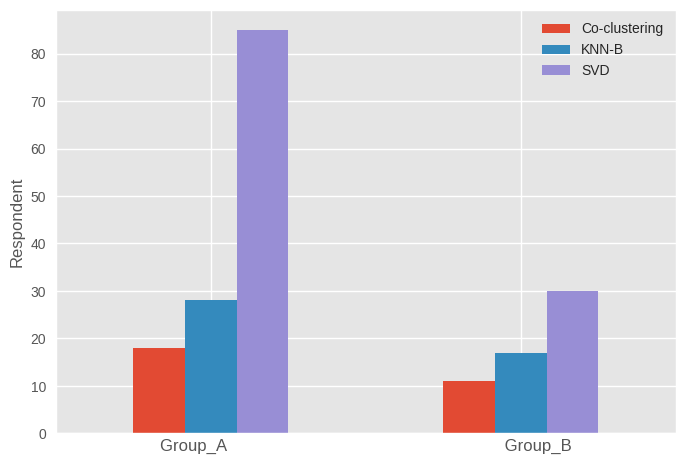

In [274]:
test_data = pd.read_csv('b.csv')
graph(test_data)

## Satisfaction Personality

### Imaginative satisfaction

In [278]:
personality_alog[["user_id",'imaginative',
                 'better_help']].groupby(['imaginative',
                 'better_help',]).size()

imaginative        better_help  
Agree              Co-clustering    12
                   KNN-B            41
                   SVD              48
Disagree           Co-clustering     1
                   KNN-B             1
                   SVD               1
Neutral            Co-clustering     8
                   KNN-B             3
                   SVD               5
Strongly_Agree     Co-clustering     6
                   KNN-B            30
                   SVD              32
Strongly_Disagree  SVD               1
dtype: int64

<Figure size 50x100 with 0 Axes>

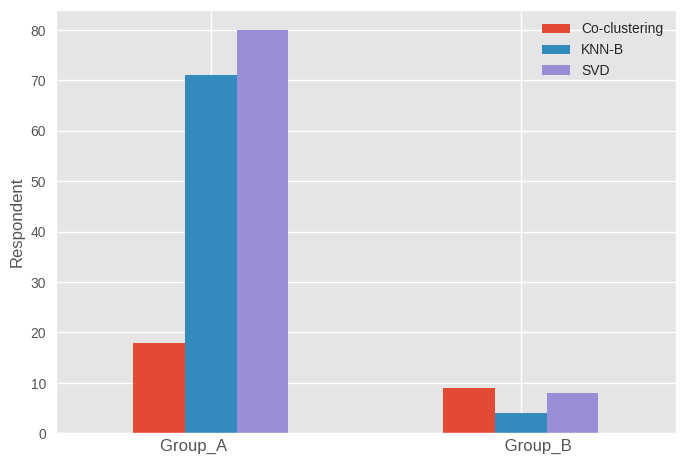

In [287]:
test_data = pd.read_csv('imaginative_better_help.csv')
graph(test_data)

In [277]:
personality_alog[["user_id",'imaginative',
                 'recommended_list']].groupby(['imaginative',
                 'recommended_list',]).size()

imaginative        recommended_list
Agree              Co-clustering       21
                   KNN-B               12
                   SVD                 68
Disagree           Co-clustering        1
                   KNN-B                2
Neutral            Co-clustering        6
                   KNN-B                4
                   SVD                  6
Strongly_Agree     Co-clustering        8
                   KNN-B               17
                   SVD                 43
Strongly_Disagree  SVD                  1
dtype: int64

<Figure size 50x100 with 0 Axes>

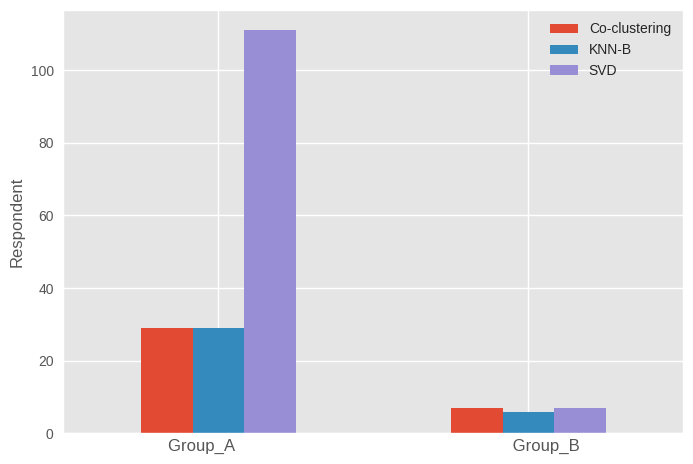

In [288]:
test_data = pd.read_csv('imaginative_recommended_list.csv')
graph(test_data)

### Organized satisfaction

In [279]:
personality_alog[["user_id",'organized',
                 'better_help']].groupby(['organized',
                 'better_help',]).size()


organized          better_help  
Agree              Co-clustering    10
                   KNN-B            57
                   SVD              43
Disagree           Co-clustering     1
                   KNN-B             4
                   SVD               9
Neutral            Co-clustering    12
                   KNN-B            10
                   SVD              15
Strongly_Agree     Co-clustering     4
                   KNN-B             3
                   SVD              18
Strongly_Disagree  KNN-B             1
                   SVD               2
dtype: int64

<Figure size 50x100 with 0 Axes>

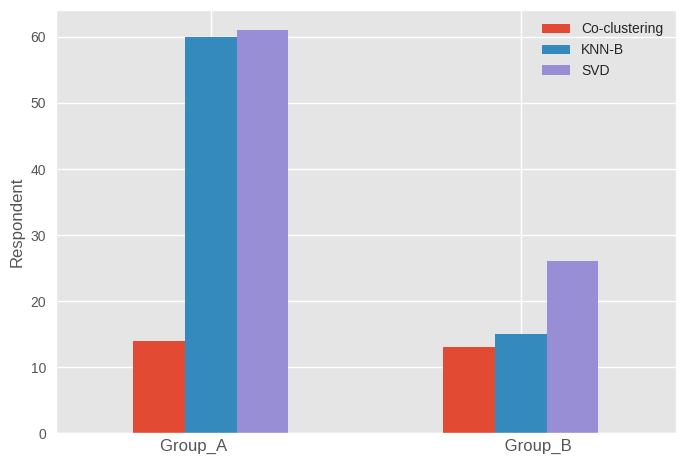

In [289]:
test_data = pd.read_csv('organized_better_help.csv')
graph(test_data)


In [280]:
personality_alog[["user_id",'organized',
                 'recommended_list']].groupby(['organized',
                 'recommended_list',]).size()

organized          recommended_list
Agree              Co-clustering       15
                   KNN-B               16
                   SVD                 79
Disagree           Co-clustering        4
                   KNN-B                3
                   SVD                  7
Neutral            Co-clustering       12
                   KNN-B               10
                   SVD                 15
Strongly_Agree     Co-clustering        5
                   KNN-B                6
                   SVD                 14
Strongly_Disagree  SVD                  3
dtype: int64

<Figure size 50x100 with 0 Axes>

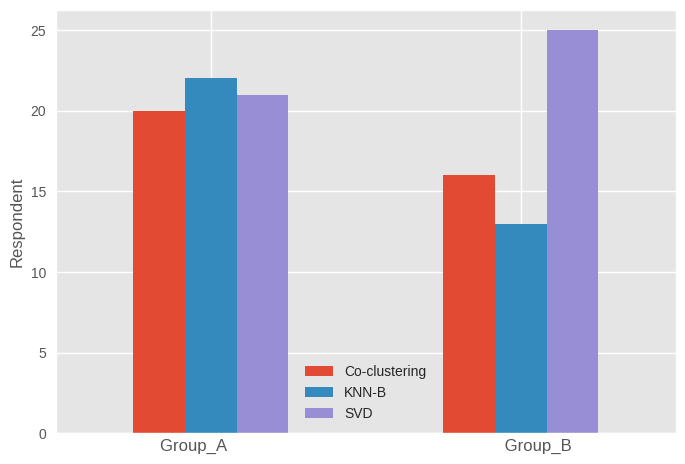

In [290]:
test_data = pd.read_csv('organized_recommended_list.csv')
graph(test_data)

### Enthusiastic satisfaction

In [281]:
personality_alog[["user_id",'enthusiastic',
                 'better_help']].groupby(['enthusiastic',
                 'better_help',]).size()


enthusiastic       better_help  
Agree              Co-clustering    11
                   KNN-B             6
                   SVD              22
Disagree           Co-clustering     8
                   KNN-B            30
                   SVD              22
Neutral            Co-clustering     2
                   KNN-B            31
                   SVD              31
Strongly_Agree     Co-clustering     3
                   KNN-B             5
                   SVD               8
Strongly_Disagree  Co-clustering     3
                   KNN-B             3
                   SVD               4
dtype: int64

<Figure size 50x100 with 0 Axes>

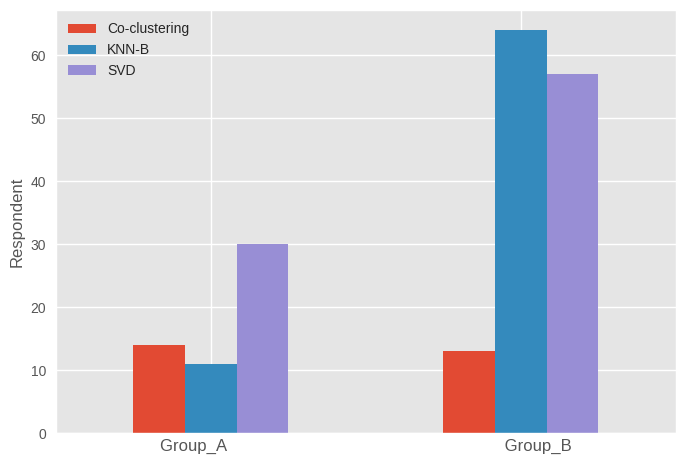

In [291]:
test_data = pd.read_csv('enthusiastic_better_help.csv')
graph(test_data)

In [282]:
personality_alog[["user_id",'enthusiastic',
                 'recommended_list']].groupby(['enthusiastic',
                 'recommended_list',]).size()

enthusiastic       recommended_list
Agree              Co-clustering       12
                   KNN-B               13
                   SVD                 14
Disagree           Co-clustering        5
                   KNN-B                7
                   SVD                 48
Neutral            Co-clustering       11
                   KNN-B               12
                   SVD                 41
Strongly_Agree     Co-clustering        5
                   KNN-B                2
                   SVD                  9
Strongly_Disagree  Co-clustering        3
                   KNN-B                1
                   SVD                  6
dtype: int64

<Figure size 50x100 with 0 Axes>

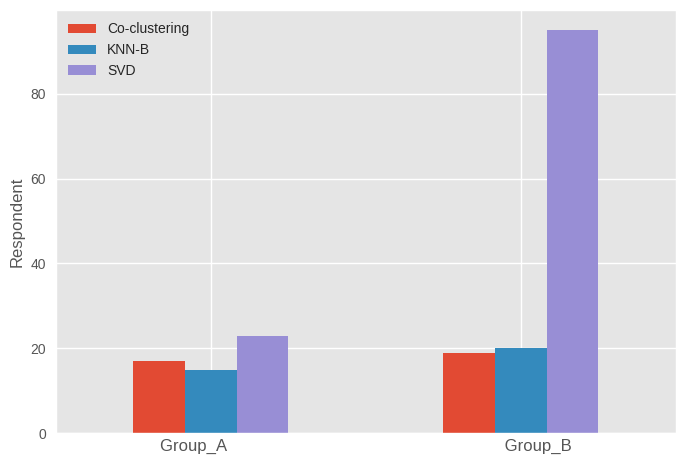

In [292]:

test_data = pd.read_csv('enthusiastic_recommended_list.csv')
graph(test_data)

### kind satisfaction

In [283]:
personality_alog[["user_id",'kind',
                 'better_help']].groupby(['kind',
                 'better_help',]).size()

kind               better_help  
Agree              Co-clustering    12
                   KNN-B            31
                   SVD              43
Disagree           Co-clustering     2
                   KNN-B            30
                   SVD               5
Neutral            Co-clustering     9
                   KNN-B             7
                   SVD              10
Strongly_Agree     Co-clustering     4
                   KNN-B             5
                   SVD              27
Strongly_Disagree  KNN-B             2
                   SVD               2
dtype: int64

<Figure size 50x100 with 0 Axes>

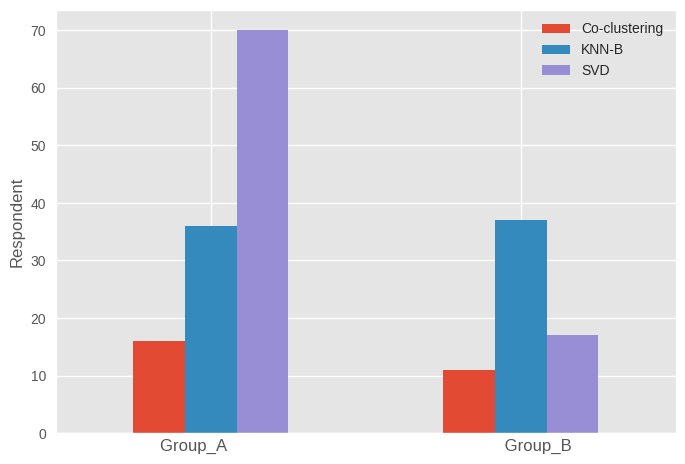

In [293]:
test_data = pd.read_csv('kind_better_help.csv')
graph(test_data)

In [284]:
personality_alog[["user_id",'kind',
                 'recommended_list']].groupby(['kind',
                 'recommended_list',]).size()

kind               recommended_list
Agree              Co-clustering       21
                   KNN-B               17
                   SVD                 48
Disagree           Co-clustering        3
                   KNN-B                2
                   SVD                 32
Neutral            Co-clustering        6
                   KNN-B                7
                   SVD                 13
Strongly_Agree     Co-clustering        6
                   KNN-B                8
                   SVD                 22
Strongly_Disagree  KNN-B                1
                   SVD                  3
dtype: int64

<Figure size 50x100 with 0 Axes>

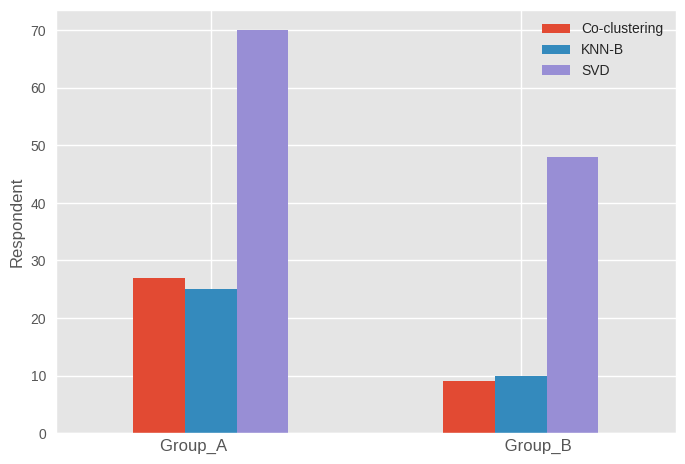

In [294]:
test_data = pd.read_csv('kind_recommended_list.csv')
graph(test_data)

### calm satisfaction

In [285]:
personality_alog[["user_id",'calm',
                 'better_help']].groupby(['calm',
                 'better_help',]).size()

calm               better_help  
Agree              Co-clustering     6
                   KNN-B            36
                   SVD              41
Disagree           Co-clustering     4
                   KNN-B             4
                   SVD               9
Neutral            Co-clustering    13
                   KNN-B             8
                   SVD              18
Strongly_Agree     Co-clustering     3
                   KNN-B            27
                   SVD              18
Strongly_Disagree  Co-clustering     1
                   SVD               1
dtype: int64

<Figure size 50x100 with 0 Axes>

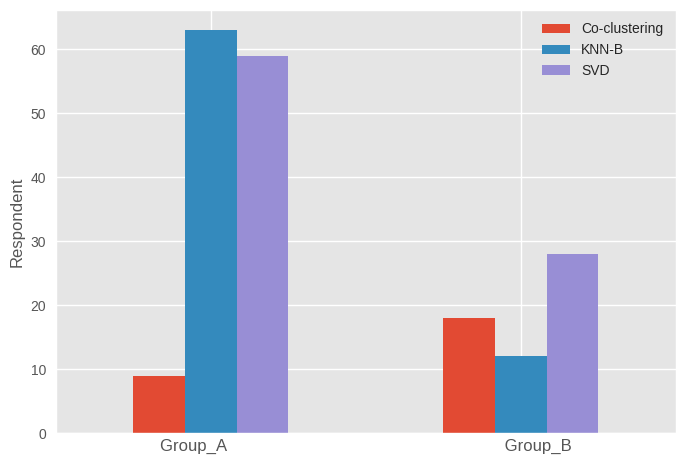

In [295]:
test_data = pd.read_csv('calm_better_help.csv')
graph(test_data)

In [296]:
personality_alog[["user_id",'calm',
                 'recommended_list']].groupby(['calm',
                 'recommended_list',]).size()

calm               recommended_list
Agree              Co-clustering        8
                   KNN-B               19
                   SVD                 56
Disagree           Co-clustering        6
                   KNN-B                4
                   SVD                  7
Neutral            Co-clustering       14
                   KNN-B                8
                   SVD                 17
Strongly_Agree     Co-clustering        7
                   KNN-B                4
                   SVD                 37
Strongly_Disagree  Co-clustering        1
                   SVD                  1
dtype: int64

<Figure size 50x100 with 0 Axes>

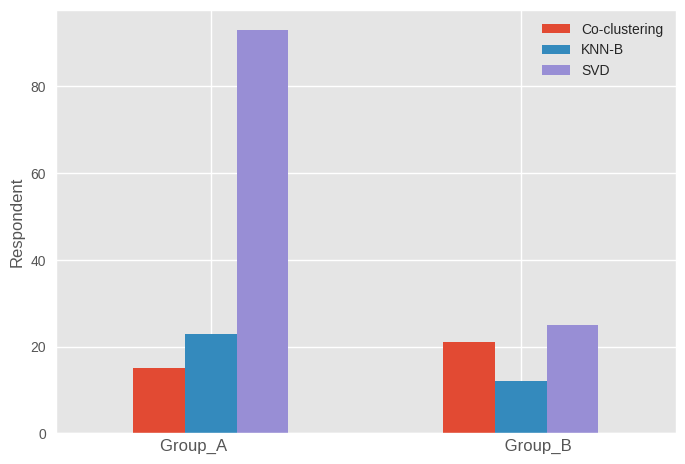

In [297]:
test_data = pd.read_csv('calm_recommended_list.csv')
graph(test_data)

## Novelty Personality

### Imaginative Novelty

In [300]:
personality_alog[["user_id",'imaginative',
                 'not_expect']].groupby(['imaginative',
                 'not_expect',]).size()

imaginative        not_expect   
Agree              Co-clustering    61
                   KNN-B            30
                   SVD              10
Disagree           Co-clustering     1
                   KNN-B             1
                   SVD               1
Neutral            Co-clustering     4
                   KNN-B             8
                   SVD               4
Strongly_Agree     Co-clustering    37
                   KNN-B            23
                   SVD               8
Strongly_Disagree  Co-clustering     1
dtype: int64

<Figure size 50x100 with 0 Axes>

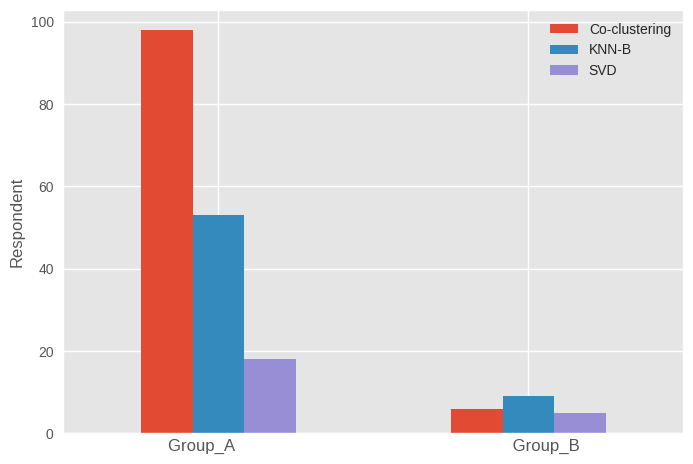

In [301]:
test_data = pd.read_csv('imaginative_not_expect.csv')
graph(test_data)

In [302]:
personality_alog[["user_id",'imaginative',
                 'familiar_list']].groupby(['imaginative',
                 'familiar_list',]).size()

imaginative        familiar_list
Agree              Co-clustering    18
                   KNN-B            40
                   SVD              43
Disagree           Co-clustering     1
                   KNN-B             2
Neutral            Co-clustering    10
                   KNN-B             1
                   SVD               5
Strongly_Agree     Co-clustering    15
                   KNN-B            10
                   SVD              43
Strongly_Disagree  KNN-B             1
dtype: int64

<Figure size 50x100 with 0 Axes>

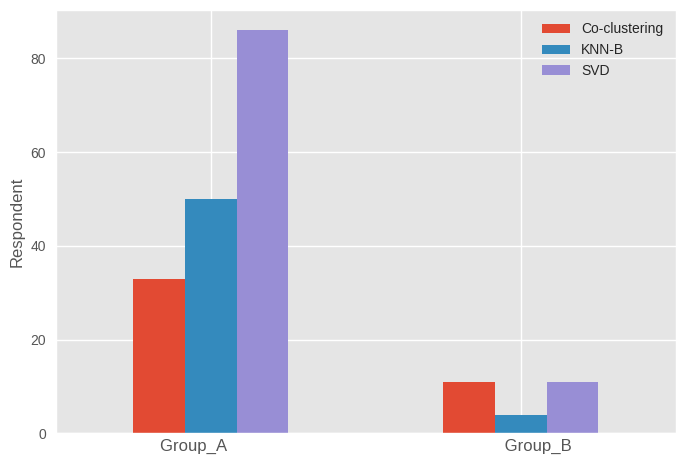

In [303]:
test_data = pd.read_csv('imaginative_familiar_list.csv')
graph(test_data)

In [304]:
personality_alog[["user_id",'imaginative',
                 'surprising_list']].groupby(['imaginative',
                 'surprising_list',]).size()

imaginative        surprising_list
Agree              Co-clustering      24
                   KNN-B              45
                   SVD                32
Disagree           Co-clustering       2
                   KNN-B               1
Neutral            Co-clustering       8
                   KNN-B               5
                   SVD                 3
Strongly_Agree     Co-clustering      13
                   KNN-B              42
                   SVD                13
Strongly_Disagree  SVD                 1
dtype: int64

<Figure size 50x100 with 0 Axes>

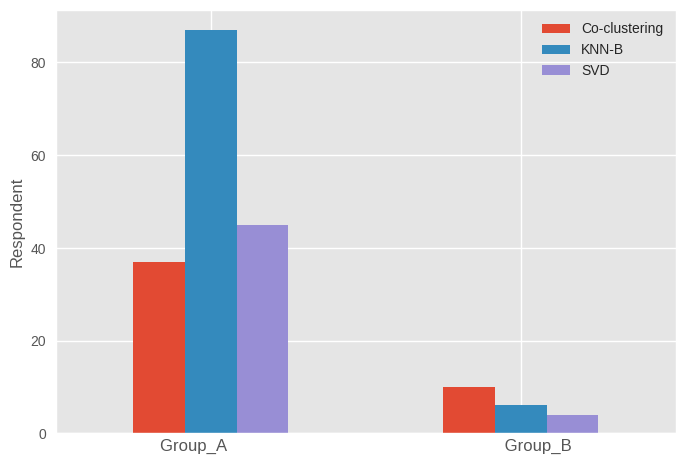

In [305]:
test_data = pd.read_csv('imaginative_surprising_list.csv')
graph(test_data)

In [306]:
personality_alog[["user_id",'imaginative',
                 'fewer_suggestions']].groupby(['imaginative',
                 'fewer_suggestions',]).size()

imaginative        fewer_suggestions
Agree              Co-clustering        30
                   KNN-B                16
                   SVD                  55
Disagree           Co-clustering         1
                   KNN-B                 1
                   SVD                   1
Neutral            Co-clustering         1
                   KNN-B                 6
                   SVD                   9
Strongly_Agree     Co-clustering        22
                   KNN-B                 9
                   SVD                  37
Strongly_Disagree  Co-clustering         1
dtype: int64

<Figure size 50x100 with 0 Axes>

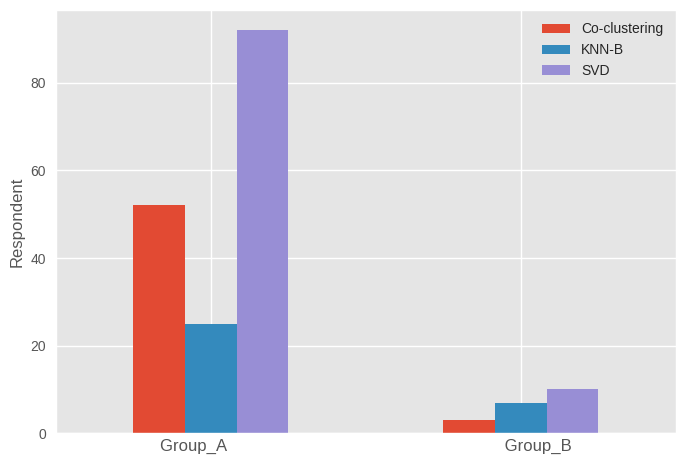

In [307]:
test_data = pd.read_csv('imaginative_fewer_suggestions.csv')
graph(test_data)

### Organized Novelty

In [308]:
personality_alog[["user_id",'organized',
                 'not_expect']].groupby(['organized',
                 'not_expect',]).size()

organized          not_expect   
Agree              Co-clustering    74
                   KNN-B            25
                   SVD              11
Disagree           Co-clustering     5
                   KNN-B             7
                   SVD               2
Neutral            Co-clustering    12
                   KNN-B            17
                   SVD               8
Strongly_Agree     Co-clustering    11
                   KNN-B            12
                   SVD               2
Strongly_Disagree  Co-clustering     2
                   KNN-B             1
dtype: int64

In [ ]:
test_data = pd.read_csv('organized_not_expect.csv')
graph(test_data)

In [309]:
personality_alog[["user_id",'organized',
                 'familiar_list']].groupby(['organized',
                 'familiar_list',]).size()


organized          familiar_list
Agree              Co-clustering    18
                   KNN-B            41
                   SVD              51
Disagree           Co-clustering     7
                   KNN-B             1
                   SVD               6
Neutral            Co-clustering    14
                   KNN-B             6
                   SVD              17
Strongly_Agree     Co-clustering     5
                   KNN-B             4
                   SVD              16
Strongly_Disagree  KNN-B             2
                   SVD               1
dtype: int64

<Figure size 50x100 with 0 Axes>

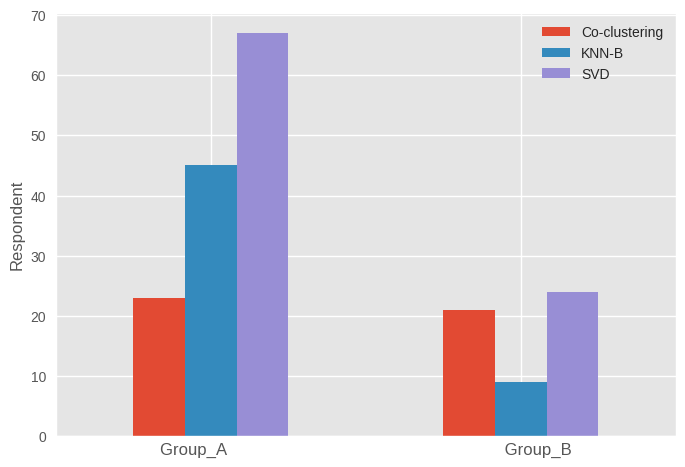

In [313]:
test_data = pd.read_csv('organized_familiar_list.csv')
graph(test_data)

In [310]:
personality_alog[["user_id",'organized',
                 'surprising_list']].groupby(['organized',
                 'surprising_list',]).size()

organized          surprising_list
Agree              Co-clustering      19
                   KNN-B              73
                   SVD                18
Disagree           Co-clustering       3
                   KNN-B               3
                   SVD                 8
Neutral            Co-clustering      20
                   KNN-B               8
                   SVD                 9
Strongly_Agree     Co-clustering       5
                   KNN-B               9
                   SVD                11
Strongly_Disagree  SVD                 3
dtype: int64

<Figure size 50x100 with 0 Axes>

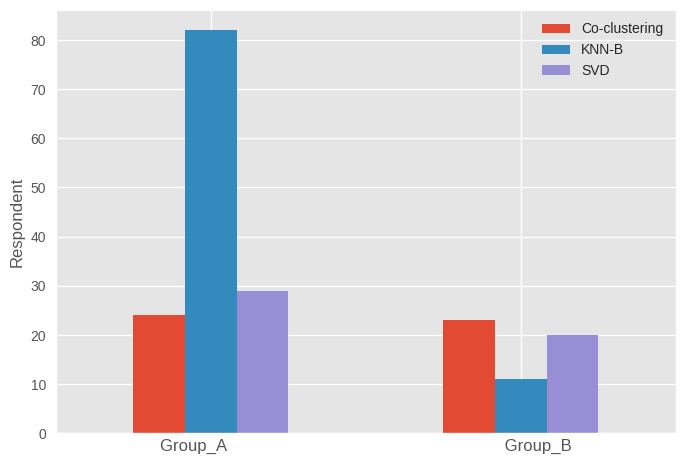

In [314]:
test_data = pd.read_csv('organized_surprising_list.csv')
graph(test_data)

In [311]:
personality_alog[["user_id",'organized',
                 'fewer_suggestions']].groupby(['organized',
                 'fewer_suggestions',]).size()

organized          fewer_suggestions
Agree              Co-clustering        22
                   KNN-B                19
                   SVD                  69
Disagree           Co-clustering         6
                   KNN-B                 3
                   SVD                   5
Neutral            Co-clustering         9
                   KNN-B                 6
                   SVD                  22
Strongly_Agree     Co-clustering        15
                   KNN-B                 4
                   SVD                   6
Strongly_Disagree  Co-clustering         3
dtype: int64

<Figure size 50x100 with 0 Axes>

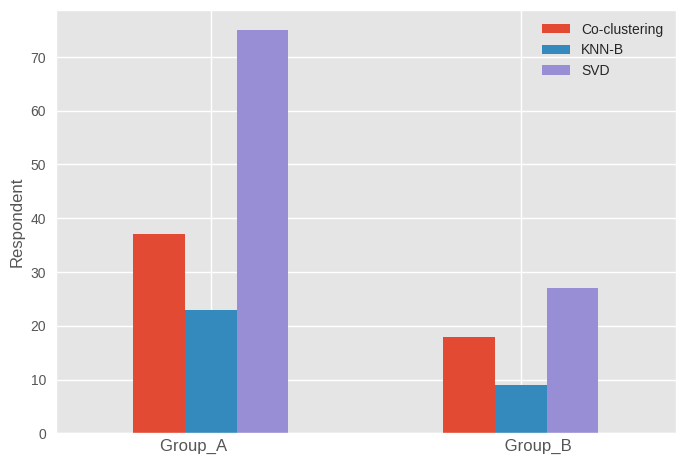

In [315]:
test_data = pd.read_csv('organized_fewer_suggestions.csv')
graph(test_data)

### enthusiastic Novelty

In [316]:
personality_alog[["user_id",'enthusiastic',
                 'not_expect']].groupby(['enthusiastic',
                 'not_expect',]).size()

enthusiastic       not_expect   
Agree              Co-clustering    18
                   KNN-B            16
                   SVD               5
Disagree           Co-clustering    38
                   KNN-B            18
                   SVD               4
Neutral            Co-clustering    35
                   KNN-B            21
                   SVD               8
Strongly_Agree     Co-clustering     8
                   KNN-B             5
                   SVD               3
Strongly_Disagree  Co-clustering     5
                   KNN-B             2
                   SVD               3
dtype: int64

<Figure size 50x100 with 0 Axes>

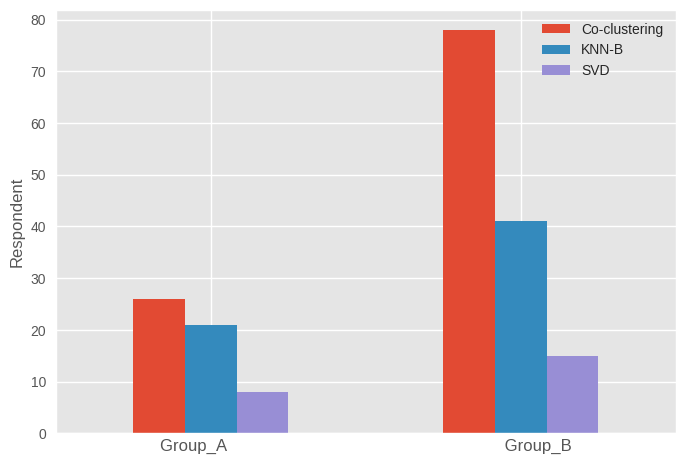

In [321]:
test_data = pd.read_csv('enthusiastic_not_expect.csv')
graph(test_data)

In [317]:
personality_alog[["user_id",'enthusiastic',
                 'familiar_list']].groupby(['enthusiastic',
                 'familiar_list',]).size()


enthusiastic       familiar_list
Agree              Co-clustering    10
                   KNN-B             5
                   SVD              24
Disagree           Co-clustering    13
                   KNN-B            32
                   SVD              15
Neutral            Co-clustering    11
                   KNN-B            10
                   SVD              43
Strongly_Agree     Co-clustering     7
                   KNN-B             4
                   SVD               5
Strongly_Disagree  Co-clustering     3
                   KNN-B             3
                   SVD               4
dtype: int64

<Figure size 50x100 with 0 Axes>

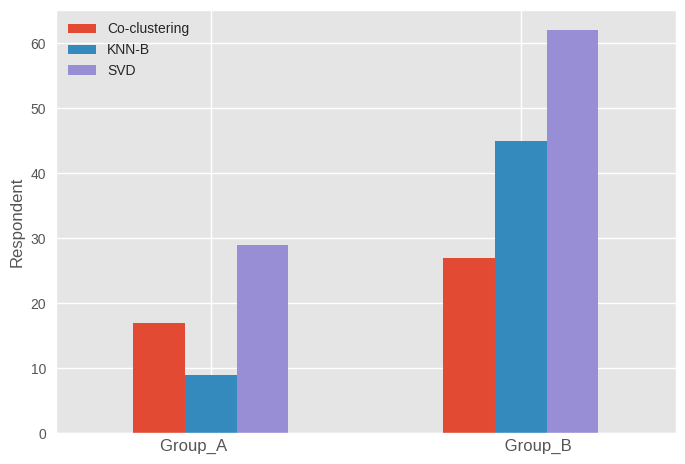

In [322]:
test_data = pd.read_csv('enthusiastic_familiar_list.csv')
graph(test_data)

In [323]:
personality_alog[["user_id",'enthusiastic',
                 'surprising_list']].groupby(['enthusiastic',
                 'surprising_list',]).size()

enthusiastic       surprising_list
Agree              Co-clustering      14
                   KNN-B              21
                   SVD                 4
Disagree           Co-clustering      12
                   KNN-B              34
                   SVD                14
Neutral            Co-clustering      14
                   KNN-B              31
                   SVD                19
Strongly_Agree     Co-clustering       5
                   KNN-B               4
                   SVD                 7
Strongly_Disagree  Co-clustering       2
                   KNN-B               3
                   SVD                 5
dtype: int64

<Figure size 50x100 with 0 Axes>

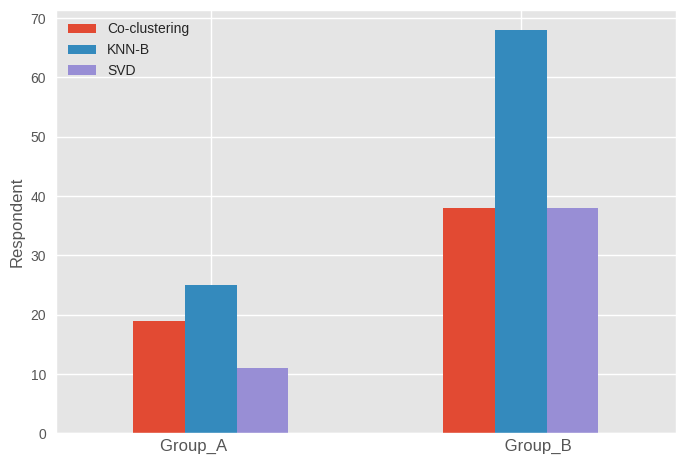

In [324]:
test_data = pd.read_csv('enthusiastic_surprising_list.csv')
graph(test_data)

In [326]:
personality_alog[["user_id",'enthusiastic',
                 'fewer_suggestions']].groupby(['enthusiastic',
                 'fewer_suggestions',]).size()

enthusiastic       fewer_suggestions
Agree              Co-clustering        16
                   KNN-B                 9
                   SVD                  14
Disagree           Co-clustering         5
                   KNN-B                 9
                   SVD                  46
Neutral            Co-clustering        24
                   KNN-B                 5
                   SVD                  35
Strongly_Agree     Co-clustering         6
                   KNN-B                 6
                   SVD                   4
Strongly_Disagree  Co-clustering         4
                   KNN-B                 3
                   SVD                   3
dtype: int64

<Figure size 50x100 with 0 Axes>

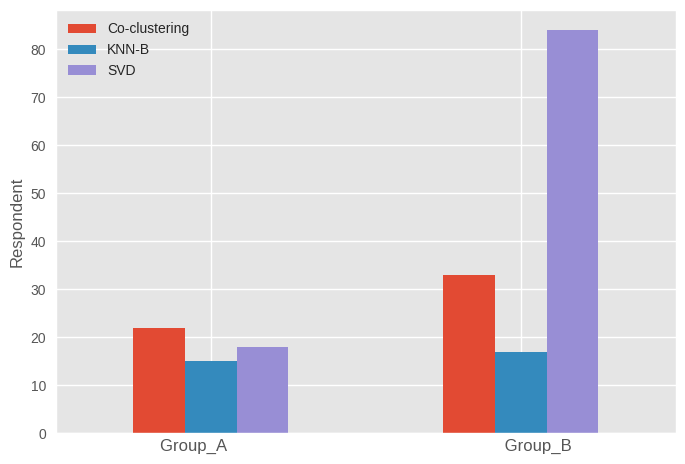

In [327]:
test_data = pd.read_csv('enthusiastic_fewer_suggestions.csv')
graph(test_data)

### kind Novelty

In [328]:
personality_alog[["user_id",'kind',
                 'not_expect']].groupby(['kind',
                 'not_expect',]).size()

kind               not_expect   
Agree              Co-clustering    48
                   KNN-B            28
                   SVD              10
Disagree           Co-clustering    31
                   KNN-B             5
                   SVD               1
Neutral            Co-clustering     7
                   KNN-B            13
                   SVD               6
Strongly_Agree     Co-clustering    16
                   KNN-B            16
                   SVD               4
Strongly_Disagree  Co-clustering     2
                   SVD               2
dtype: int64

<Figure size 50x100 with 0 Axes>

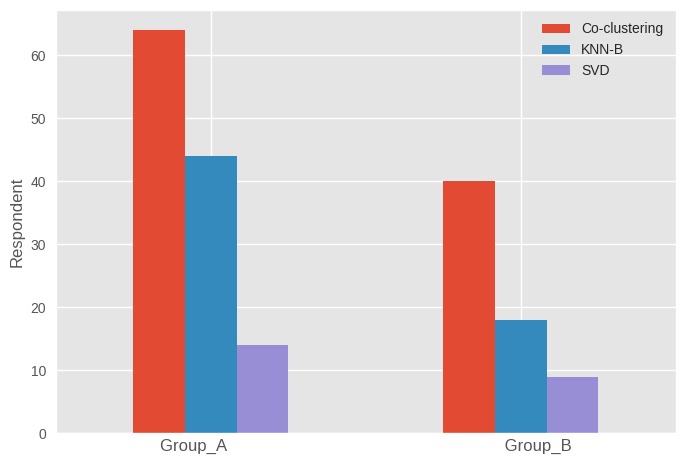

In [332]:
test_data = pd.read_csv('kind_not_expect.csv')
graph(test_data)

In [329]:
personality_alog[["user_id",'kind',
                 'familiar_list']].groupby(['kind',
                 'familiar_list',]).size()

kind               familiar_list
Agree              Co-clustering    22
                   KNN-B            13
                   SVD              51
Disagree           Co-clustering     2
                   KNN-B            30
                   SVD               5
Neutral            Co-clustering    12
                   KNN-B             5
                   SVD               9
Strongly_Agree     Co-clustering     7
                   KNN-B             4
                   SVD              25
Strongly_Disagree  Co-clustering     1
                   KNN-B             2
                   SVD               1
dtype: int64

<Figure size 50x100 with 0 Axes>

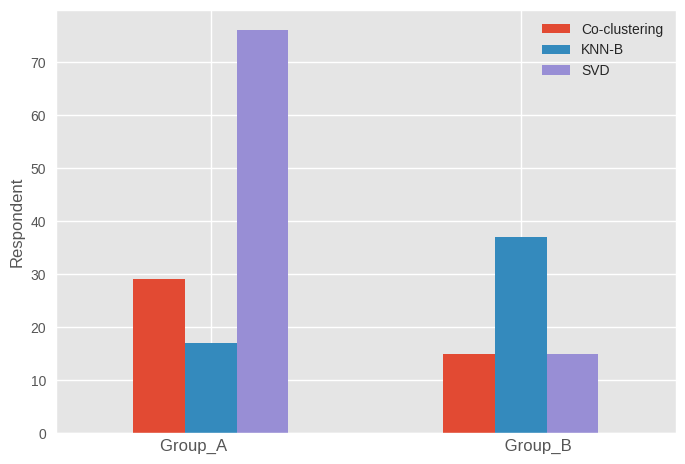

In [333]:
test_data = pd.read_csv('kind_familiar_list.csv')
graph(test_data)

In [330]:
personality_alog[["user_id",'kind',
                 'surprising_list']].groupby(['kind',
                 'surprising_list',]).size()

kind               surprising_list
Agree              Co-clustering      22
                   KNN-B              36
                   SVD                28
Disagree           Co-clustering       4
                   KNN-B              32
                   SVD                 1
Neutral            Co-clustering      12
                   KNN-B               7
                   SVD                 7
Strongly_Agree     Co-clustering       8
                   KNN-B              16
                   SVD                12
Strongly_Disagree  Co-clustering       1
                   KNN-B               2
                   SVD                 1
dtype: int64

<Figure size 50x100 with 0 Axes>

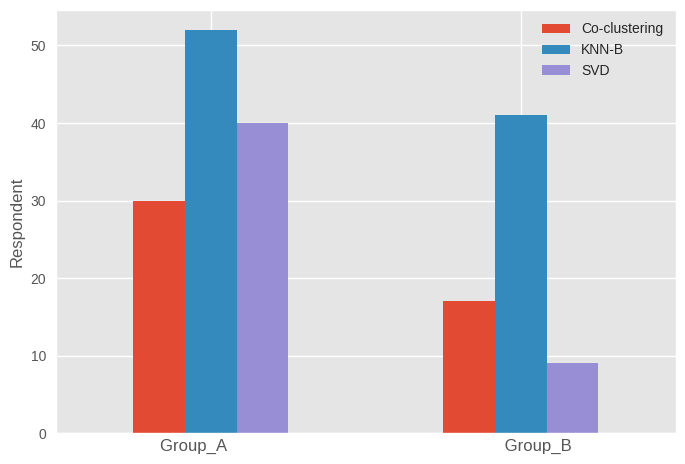

In [334]:
test_data = pd.read_csv('kind_surprising_list.csv')
graph(test_data)

In [331]:
personality_alog[["user_id",'kind',
                 'fewer_suggestions']].groupby(['kind',
                 'fewer_suggestions',]).size()

kind               fewer_suggestions
Agree              Co-clustering        31
                   KNN-B                16
                   SVD                  39
Disagree           Co-clustering         2
                   KNN-B                 1
                   SVD                  34
Neutral            Co-clustering         3
                   KNN-B                 6
                   SVD                  17
Strongly_Agree     Co-clustering        16
                   KNN-B                 8
                   SVD                  12
Strongly_Disagree  Co-clustering         3
                   KNN-B                 1
dtype: int64

<Figure size 50x100 with 0 Axes>

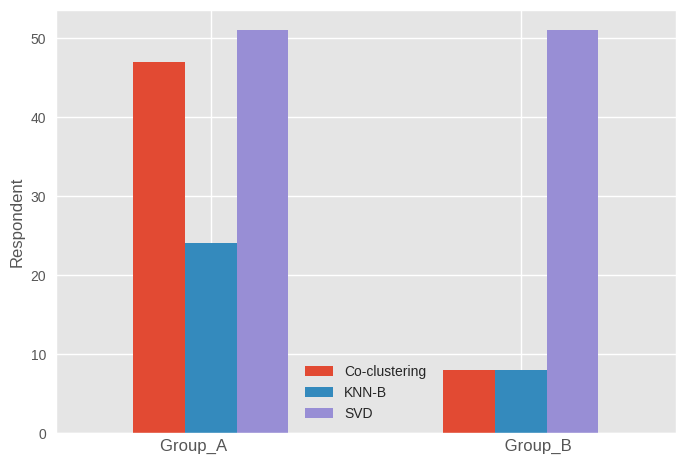

In [335]:
test_data = pd.read_csv('kind_fewer_suggestions.csv')
graph(test_data)

### calm Novelty

In [299]:
personality_alog[["user_id",'calm',
                 'not_expect']].groupby(['calm',
                 'not_expect',]).size()

calm               not_expect   
Agree              Co-clustering    60
                   KNN-B            21
                   SVD               2
Disagree           Co-clustering     7
                   KNN-B             7
                   SVD               3
Neutral            Co-clustering    10
                   KNN-B            19
                   SVD              10
Strongly_Agree     Co-clustering    26
                   KNN-B            15
                   SVD               7
Strongly_Disagree  Co-clustering     1
                   SVD               1
dtype: int64

<Figure size 50x100 with 0 Axes>

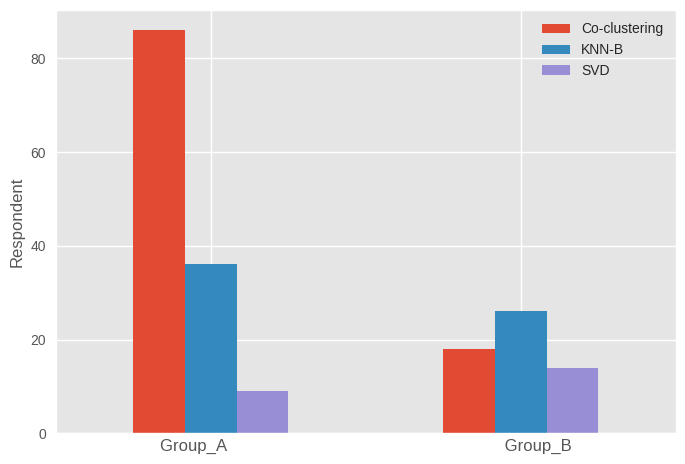

In [336]:
test_data = pd.read_csv('calm_not_expect.csv')
graph(test_data)

In [337]:
personality_alog[["user_id",'calm',
                 'familiar_list']].groupby(['calm',
                 'familiar_list',]).size()

calm               familiar_list
Agree              Co-clustering     8
                   KNN-B            37
                   SVD              38
Disagree           Co-clustering     6
                   KNN-B             3
                   SVD               8
Neutral            Co-clustering    19
                   KNN-B             8
                   SVD              12
Strongly_Agree     Co-clustering    10
                   KNN-B             5
                   SVD              33
Strongly_Disagree  Co-clustering     1
                   KNN-B             1
dtype: int64

<Figure size 50x100 with 0 Axes>

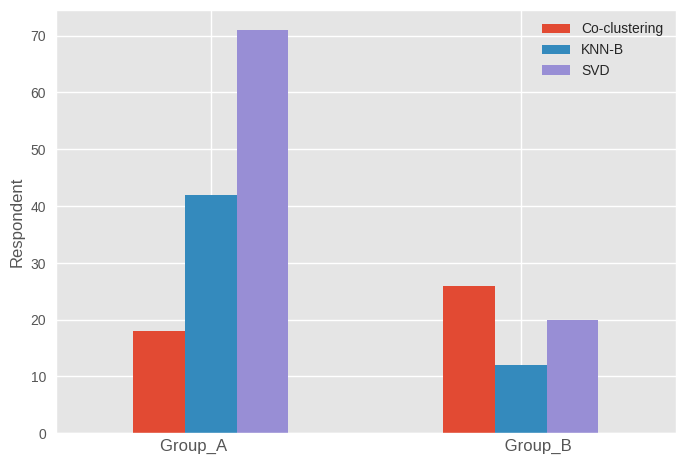

In [338]:
test_data = pd.read_csv('calm_familiar_list.csv')
graph(test_data)

In [339]:
personality_alog[["user_id",'calm',
                 'surprising_list']].groupby(['calm',
                 'surprising_list',]).size()

calm               surprising_list
Agree              Co-clustering      18
                   KNN-B              45
                   SVD                20
Disagree           Co-clustering       4
                   KNN-B              10
                   SVD                 3
Neutral            Co-clustering      18
                   KNN-B               6
                   SVD                15
Strongly_Agree     Co-clustering       7
                   KNN-B              32
                   SVD                 9
Strongly_Disagree  SVD                 2
dtype: int64

<Figure size 50x100 with 0 Axes>

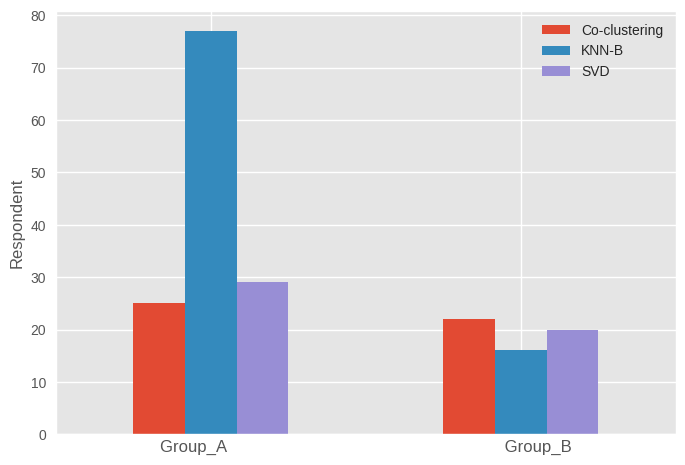

In [340]:
test_data = pd.read_csv('calm_surprising_list.csv')
graph(test_data)

In [341]:
personality_alog[["user_id",'calm',
                 'fewer_suggestions']].groupby(['calm',
                 'fewer_suggestions',]).size()

calm               fewer_suggestions
Agree              Co-clustering        27
                   KNN-B                 8
                   SVD                  48
Disagree           Co-clustering         6
                   KNN-B                 4
                   SVD                   7
Neutral            Co-clustering         9
                   KNN-B                 8
                   SVD                  22
Strongly_Agree     Co-clustering        12
                   KNN-B                11
                   SVD                  25
Strongly_Disagree  Co-clustering         1
                   KNN-B                 1
dtype: int64

<Figure size 50x100 with 0 Axes>

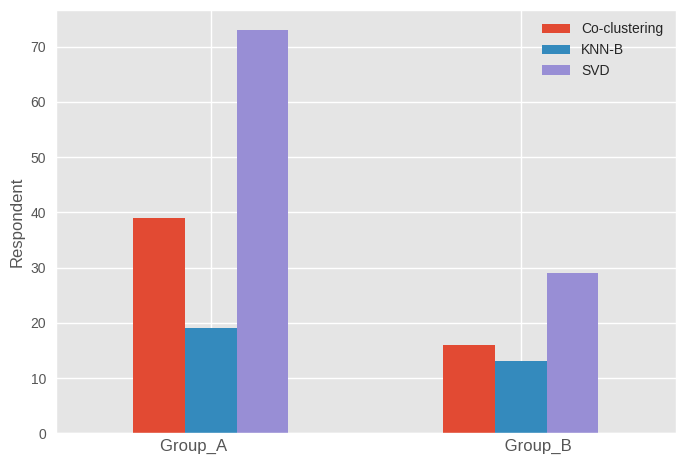

In [342]:
test_data = pd.read_csv('calm_fewer_suggestions.csv')
graph(test_data)